In [1]:
# coding: utf-8

import os
from os.path import isfile, join, isdir
import subprocess as sbp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import sklearn as skl

#import mysql.connector as mdb
import mariadb as mdb
#from mariadb.constants import CLIENT
import simplejson as js

#from IPython.core.interactiveshell import InteractiveShell

#InteractiveShell.ast_node_interactivity = "all"


#def check_trigger():
  
  
RunAllQueries=True

# connection parameters
with open('creds/creds.json') as f:
  conn_params= js.load(f)

print(conn_params)

# We connect to the MariaDB server
##print(CLIENT.LOCAL_FILES)
conn= mdb.connect(**conn_params, local_infile=True)#client_flag=CLIENT.LOCAL_FILES)

curs= conn.cursor()


#cursor=mdbconn.cursor()


#sqlfiles=["createJPtab.sql"]#,"createArgentTab2.sql","Queries.sql"]
fetchLs=[True,True,True]
sqlcomm={}
sqlresu={}

#OneLinerFileLs=[f for f in os.listdir() if isfile( f) if  "OneLiner" in (f)  ]

OneLinerFileLs=[  "OneLinerscreateJPtab.txt","OneLinerscreateArgenTab2.txt"]##  ,"OneLinersQueries.txt"]

print(OneLinerFileLs)

OneLinerDct={}
for OLF in OneLinerFileLs:
  OneLinerDct[OLF]=[]
  fread=open(OLF,"r")
  for l in fread:
    if l.isspace():
      continue
    OneLinerDct[OLF].append(l.strip("\n"))
    
    
#print(OneLinerDct)


    
if RunAllQueries==True:
  for iOLF,OLF in enumerate(OneLinerFileLs,0):
    
    if iOLF>1:
      continue
    
    print("Running commands from ", OLF.strip("OneLiners"))
    
    OLL=OneLinerDct[OLF]
    for l in OLL:
      
    #pass
    ### to catch possible mdb errors
      print("Executing SQL :",l)
      try:
        curs.execute(l)
        conn.commit()
      except mdb.Error as e:
        print(f"Error: {e}")
        
  #  sqlresu[sqlfile]=[]
  #  sqlcomm[sqlfile]=get_sql_commands(sqlfile)
    
  #  for sqlc in sqlcomm:
  #    curs.execute(sqlc)
  #    tempsql=curs.fetchall()
      
  #    sqlresu[sqlfile].append(tempsql)




curs.execute("SHOW Tables;")
tempsql=curs.fetchall()
print(tempsql)
print(type(tempsql))
SQLTabNames=[stri[0] for stri in tempsql]
print(SQLTabNames)


### Retrieve the tabs!
SQLTabs={}
SQLCols={}

for tabname in SQLTabNames:
  curs.execute("SELECT * FROM "+tabname)
  #print(curs.fetchall())
  SQLTabs[tabname]=curs.fetchall()
  curs.execute("DESCRIBE "+tabname)
  SQLCols[tabname]=curs.fetchall()
  

print(type(SQLTabs["BookSells"]))
print(SQLTabs["BookSells"][0])

print(SQLCols["BookSells"])

ColNames={}
ColTypes={}
ColNamesDF={}
DFdct={}
for tabname in SQLTabNames:
  #ColNames[tabname]=list(SQLCols[tabname]["Field"])
  ColNamesDF[tabname]=pd.DataFrame(SQLCols[tabname])
  #ColNameTypes[tabname]=list(SQLCols[tabname]["Type"])
  ColNames[tabname]=list(ColNamesDF[tabname][0])
  ColTypes[tabname]=list(ColNamesDF[tabname][1])
  
  DFdct[tabname]=pd.DataFrame(SQLTabs[tabname], columns=ColNames[tabname])
#print(ColNames["BookSells"])
print(ColNamesDF["BookSells"].head())
#print(ColNameTypes["BookSells"])
print(ColNames["BookSells"])
print(ColTypes["BookSells"])


for tabname in SQLTabNames:
  
  print(tabname)
  print(list(DFdct[tabname].columns))
  print(DFdct[tabname].describe())
## Close the connection. 
conn.close


### And proceed with Pandas DFs.







{'user': 'bookseller', 'password': 'JPRambo', 'host': 'localhost', 'database': 'booksellsdb'}
['OneLinerscreateJPtab.txt', 'OneLinerscreateArgenTab2.txt']
Running commands from  createJPtab.txt
Executing SQL : DROP TABLE IF EXISTS BookSells;
Executing SQL :   CREATE TABLE BookSells(  purchase_date nchar(255),  sell_date nchar(255), days_held bigint, author nchar(255), title nchar(255), price_bought decimal(18,4), price_sold decimal(18,4), profit decimal(18,4),  customer nchar(255) );
Executing SQL :   LOAD DATA LOCAL INFILE "BookSellsDataAnon.csv" INTO TABLE BookSells FIELDS TERMINATED BY "," ENCLOSED BY '"' LINES TERMINATED BY "\n" IGNORE 1 ROWS;
Executing SQL :   UPDATE BookSells SET purchase_date=str_to_date(purchase_date, "%d/%m/%Y");
Executing SQL :   UPDATE BookSells SET sell_date=str_to_date(sell_date, "%d/%m/%Y");
Executing SQL :   ALTER TABLE BookSells ADD COLUMN id bigint AUTO_INCREMENT PRIMARY KEY FIRST;
Running commands from  createArgenTab2.txt
Executing SQL : DROP TABLE I

<bound method Connection.close of <mariadb.connection connected to 'localhost' at 0x7f6dcafc6a88>>

In [2]:
SQLTabNames

['ArgenPeso', 'BookSells']

There are many missing values in BookSells. Before doing a JOIN operation to get the transaction (buy and sell) prices in USD, we have to perform a data imputation. First, dropping the null values, we will extract a distribution of the *days_held* variable. Then, depending on 

In [3]:
DFdct["BookSells"].columns

Index(['id', 'purchase_date', 'sell_date', 'days_held', 'author', 'title',
       'price_bought', 'price_sold', 'profit', 'customer'],
      dtype='object')

In [4]:
## Giving back the NaNs 

In [5]:
BooksDF=DFdct["BookSells"]

count                    5140
unique                    567
top       2017-05-25 00:00:00
freq                      228
first     2012-07-18 00:00:00
last      2021-12-07 00:00:00
Name: purchase_date, dtype: object
count                    5613
unique                   1518
top       2020-05-07 00:00:00
freq                       27
first     2012-07-24 00:00:00
last      2022-01-03 00:00:00
Name: sell_date, dtype: object


/home/jax/Orico/JPDataAnon/env/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  # This is added back by InteractiveShellApp.init_path()
/home/jax/Orico/JPDataAnon/env/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  if sys.path[0] == "":


<AxesSubplot:>

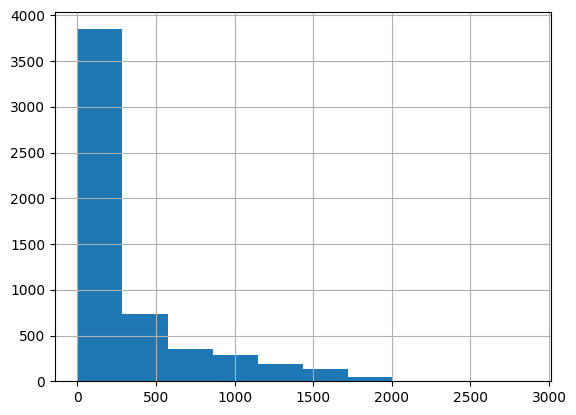

In [6]:
BooksDF.columns
#BooksDF["purchase_date"].head(5)
BooksDF.dtypes
BooksDF.head(5)

BooksDF["purchase_date"]=pd.to_datetime(BooksDF["purchase_date"],errors="coerce")
BooksDF["sell_date"]=pd.to_datetime(BooksDF["sell_date"],errors="coerce")

BooksDF.head(5)

print(BooksDF["purchase_date"].describe())
print(BooksDF["sell_date"].describe())

BooksDF["days_held"].hist()

In [7]:

#DictioNaN={"purchase_date":["0000-00-00"]}
#for var, val in DictioNaN.items():
#    BooksDF[var].replace(val,)

In [8]:
BooksDF["days_held"]=BooksDF["sell_date"]-BooksDF["purchase_date"]
BooksDF["days_held"]=BooksDF["days_held"].dt.days
BooksDF.head()

id purchase_date  sell_date  days_held             author  \
0   1           NaT 2012-07-24        NaN  Bukowski, Charles   
1   2           NaT 2012-07-31        NaN     Orwell, George   
2   3           NaT 2012-08-01        NaN    Cortázar, Julio   
3   4           NaT 2012-08-01        NaN      Bradbury, Ray   
4   5           NaT 2012-08-07        NaN   Golding, William   

                    title price_bought price_sold   profit  \
0                 Mujeres      40.0000    65.0000  25.0000   
1                    1984       0.0000    30.0000  30.0000   
2                 Rayuela      35.0000    70.0000  35.0000   
3          Fahrenheit 451       0.0000    30.0000  30.0000   
4  El señor de las moscas      20.0000    50.0000  30.0000   

                                            customer  
0  bd1bd4bb48519c8683a49539c616bc1cf006c5aa9326e9...  
1  902fbd0106f4146520a9e7ddd31e0481971c574a92b8ff...  
2  0240bd52e98a39c0d2c2286a2741138c50040c600a0063...  
3  0240bd52e98a39c0d2c2286a2741138c50040c600a0063...  
4  150bbe57e24517b82fa15e16c4eae1996071d625b1c430...

332.5854085603113 444.07526011079227
4.73177886626523 1.7004903435284053


count    5613.000000
mean      305.537324
std       434.207311
min         0.000000
25%        20.000000
50%       101.000000
75%       412.000000
max      2909.000000
Name: days_held, dtype: float64

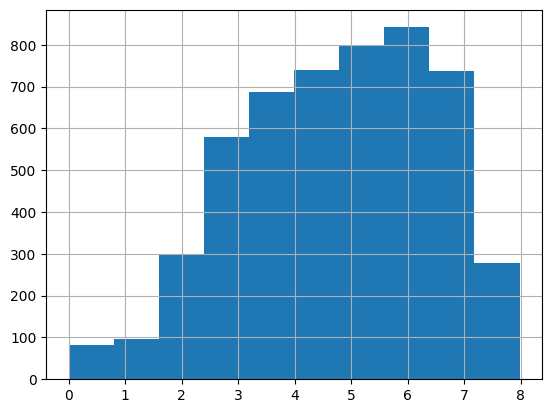

In [9]:

### Days held imputation. Random on the 

averagedays=BooksDF["days_held"].mean()
stdheld=BooksDF["days_held"].std()
print(averagedays,stdheld)
BooksDF["days_held"].describe()
#BooksDF["days_held"].hist()
BooksDF["days_held_log"]=np.log(1+BooksDF["days_held"])
BooksDF["days_held_log"].hist()
avglog=BooksDF["days_held_log"].mean()
stdlog=BooksDF["days_held_log"].std()

print(avglog,stdlog)

BooksDF["days_held_log"]=BooksDF["days_held_log"].astype("float")
BooksDF.loc[BooksDF["days_held_log"].isna(),"days_held_log"]=np.random.normal(loc=0.5*avglog, scale=0.25*stdlog,\
    size=np.sum(BooksDF['days_held_log'].isna())) 
BooksDF["days_held_log"].describe()
BooksDF.loc[BooksDF["days_held"].isna(),"days_held"]=np.exp( BooksDF.loc[BooksDF["days_held"].isna(),"days_held_log"] )

BooksDF["days_held"]=BooksDF["days_held"].astype(int)
BooksDF["days_held"].describe()

<AxesSubplot:>

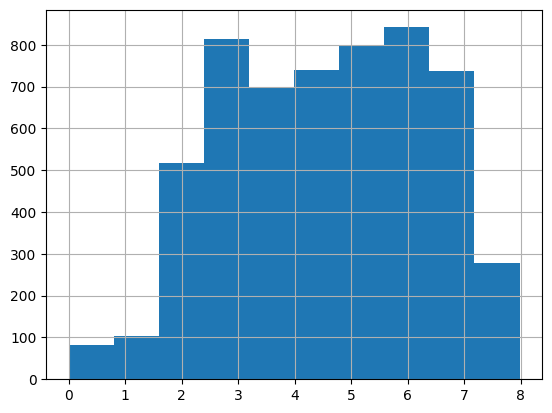

In [10]:
BooksDF["days_held_log"].hist()

In [11]:


BooksDF["days_held"].describe()

## We label the transactions that have full data and do not require imputation
#cplt=np.all( (BooksDF["purchase_date"].isna()==False &\
#              BooksDF["sell_date"].isna()==False),axis=1 )#, True,False )
cplt = ( BooksDF["purchase_date"].notna() ) & (BooksDF["sell_date"].notna())
BooksDF["complete"]=cplt

## We fix those with only one missing date.
nopurch=BooksDF["purchase_date"].isna() & BooksDF["sell_date"].isna()==False
BooksDF.loc[nopurch ,"purchase_date"]=BooksDF.loc[nopurch,"sell_date"]-\
pd.to_timedelta(BooksDF.loc[nopurch,"days_held"],unit="D")

nosell=BooksDF["sell_date"].isna() & BooksDF["purchase_date"].isna()==False
BooksDF.loc[nopurch ,"sell_date"]=BooksDF.loc[nosell,"purchase_date"]+\
pd.to_timedelta(BooksDF.loc[nosell,"days_held"],unit="D")

nopurchnosell=BooksDF["sell_date"].isna() & BooksDF["purchase_date"].isna()
BooksDF.loc[nopurchnosell ,"purchase_date"]=BooksDF.loc[nopurchnosell,"purchase_date"].interpolate()
BooksDF.loc[nopurchnosell ,"sell_date"]=BooksDF.loc[nopurchnosell,"sell_date"].interpolate()

BooksDF["purchase_date"]=BooksDF["purchase_date"].dt.date
BooksDF["sell_date"]=BooksDF["sell_date"].dt.date


In [12]:
BooksDF["sell_date"].describe()

count           5613
unique          1518
top       2020-05-07
freq              27
Name: sell_date, dtype: object

In [13]:
BooksDF["purchase_date"].describe()

count           5613
unique           896
top       2017-05-25
freq             228
Name: purchase_date, dtype: object

In [14]:
print(BooksDF["complete"].describe())
print(BooksDF["complete"].head())
print(BooksDF["complete"].tail())


count     5613
unique       2
top       True
freq      5140
Name: complete, dtype: object
0    False
1    False
2    False
3    False
4    False
Name: complete, dtype: bool
5608    True
5609    True
5610    True
5611    True
5612    True
Name: complete, dtype: bool


In [15]:

newDates=pd.concat([BooksDF["sell_date"],BooksDF["purchase_date"]],axis=0)
newDates=newDates.to_frame(name="date").drop_duplicates(keep="first").reset_index(drop=True)
print(newDates.head())
print(newDates.tail())
print(len(newDates))
newDates["adj_close"]=np.nan
print("Just created newDates")
print(newDates.tail())




PesoDF=DFdct["ArgenPeso"]
PesoDF=PesoDF.drop(["id","days"],axis=1)
PesoDF["date"]=pd.to_datetime(PesoDF["date"],errors="coerce").dt.date
print("pesoDF.tail()")
print(PesoDF.tail())



PesoDF=pd.concat([PesoDF,newDates])
PesoDF.drop_duplicates(subset="date",inplace=True)

print(PesoDF.info())

         date
0  2012-07-24
1  2012-07-31
2  2012-08-01
3  2012-08-07
4  2012-08-24
            date
1925  2021-09-24
1926  2020-09-12
1927  2021-11-02
1928  2021-11-30
1929  2021-12-07
1930
Just created newDates
            date  adj_close
1925  2021-09-24        NaN
1926  2020-09-12        NaN
1927  2021-11-02        NaN
1928  2021-11-30        NaN
1929  2021-12-07        NaN
pesoDF.tail()
            date adj_close
5492  2022-08-02  131.8951
5493  2022-08-03  132.1423
5494  2022-08-04  132.4041
5495  2022-08-05  132.6418
5496  2022-08-06  132.8500
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5946 entries, 0 to 1926
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       5946 non-null   object
 1   adj_close  5497 non-null   object
dtypes: object(2)
memory usage: 139.4+ KB
None


In [16]:
PesoDF.sort_values(by="date",inplace=True)
PesoDF.reset_index(inplace=True,drop=True)
PesoDF["adj_close"]=PesoDF["adj_close"].astype(float)
PesoDF["adj_close"].interpolate( inplace=True)

print(PesoDF.head())
print(PesoDF.tail())

print("PesoDF properties")
print(PesoDF.describe())
print(PesoDF.info())
PesoDF.to_csv("pesoDF.csv")

         date  adj_close
0  2001-07-13     0.9994
1  2001-07-16     0.9988
2  2001-07-17     0.9987
3  2001-07-18     0.9987
4  2001-07-19     0.9987
            date  adj_close
5941  2022-08-02   131.8951
5942  2022-08-03   132.1423
5943  2022-08-04   132.4041
5944  2022-08-05   132.6418
5945  2022-08-06   132.8500
PesoDF properties
         adj_close
count  5946.000000
mean     20.345109
std      29.932136
min       0.997900
25%       3.135700
50%       4.789450
75%      17.390825
max     132.850000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5946 non-null   object 
 1   adj_close  5946 non-null   float64
dtypes: float64(1), object(1)
memory usage: 93.0+ KB
None


In [17]:
DBlue=pd.read_csv("DollarBlue2.csv")
DBlue.rename(columns={"blue":"adj_close"},inplace=True)
DBlue["date"]=pd.to_datetime(DBlue["date"],errors="coerce").dt.date

DBlue=pd.concat([DBlue,newDates])
DBlue.drop_duplicates(subset="date",inplace=True)

DBlue.sort_values(by="date",inplace=True)
DBlue.reset_index(inplace=True,drop=True)
DBlue["adj_close"]=DBlue["adj_close"].astype(float)
DBlue["adj_close"].interpolate( inplace=True)

DBlue.info()
DBlue.to_csv("DBlueInterp.csv",index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  1984 non-null   float64
 1   date       1984 non-null   object 
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [18]:
### Now we want to create three more columns: pric_bought_USD, price_sold_USD, profit_USD
BooksDF2=BooksDF.merge(PesoDF[["date","adj_close"]],left_on="purchase_date",right_on="date",\
                       how="left",suffixes=("","purchase_"))

BooksDF2.drop(["date"],axis=1,inplace=True)
BooksDF2.rename(columns={"adj_close":"USDprice@purchase"},inplace=True)

BooksDF2=BooksDF2.merge(PesoDF[["date","adj_close"]],left_on="sell_date",right_on="date", how="left",suffixes=("","_"))



BooksDF2.drop(["date"],axis=1,inplace=True)
BooksDF2.rename(columns={"adj_close":"USDprice@sell"},inplace=True)

BooksDF2["price_bought"]=BooksDF2["price_bought"].astype(float)
BooksDF2["price_sold"]=BooksDF2["price_sold"].astype(float)
BooksDF2["profit"]=BooksDF2["profit"].astype(float)

BooksDF2["price_bought_USD"]=BooksDF2["price_bought"]/BooksDF2["USDprice@purchase"]
BooksDF2["price_sold_USD"]=BooksDF2["price_sold"]/BooksDF2["USDprice@sell"]
BooksDF2["marginUSD"]=BooksDF2["price_sold_USD"]-BooksDF2["price_bought_USD"]


### Adding Dollar Blue chart
BooksDF2=BooksDF2.merge(DBlue[["date","adj_close"]],left_on="purchase_date",\
            right_on="date", how="left",suffixes=("","_"))
BooksDF2.drop(["date"],axis=1,inplace=True)
BooksDF2.rename(columns={"adj_close":"BLUprice@purchase"},inplace=True)
BooksDF2=BooksDF2.merge(DBlue[["date","adj_close"]],left_on="sell_date",\
            right_on="date", how="left",suffixes=("","_"))
BooksDF2.drop(["date"],axis=1,inplace=True)
BooksDF2.rename(columns={"adj_close":"BLUprice@sell"},inplace=True)

BooksDF2["price_bought_BLU"]=BooksDF2["price_bought"]/BooksDF2["BLUprice@purchase"]
BooksDF2["price_sold_BLU"]=BooksDF2["price_sold"]/BooksDF2["BLUprice@sell"]
BooksDF2["marginBLU"]=BooksDF2["price_sold_BLU"]-BooksDF2["price_bought_BLU"]

BooksDF2["profitATTS_BLU"]=BooksDF2["profit"]/BooksDF2["BLUprice@sell"]




print(BooksDF2.head())
print(BooksDF2.tail())

   id purchase_date   sell_date  days_held             author  \
0   1    2012-07-12  2012-07-24         12  Bukowski, Charles   
1   2    2012-07-21  2012-07-31         10     Orwell, George   
2   3    2012-07-24  2012-08-01          8    Cortázar, Julio   
3   4    2012-07-26  2012-08-01          6      Bradbury, Ray   
4   5    2012-07-19  2012-08-07         19   Golding, William   

                    title  price_bought  price_sold  profit  \
0                 Mujeres          40.0        65.0    25.0   
1                    1984           0.0        30.0    30.0   
2                 Rayuela          35.0        70.0    35.0   
3          Fahrenheit 451           0.0        30.0    30.0   
4  El señor de las moscas          20.0        50.0    30.0   

                                            customer  ...  USDprice@sell  \
0  bd1bd4bb48519c8683a49539c616bc1cf006c5aa9326e9...  ...         4.5594   
1  902fbd0106f4146520a9e7ddd31e0481971c574a92b8ff...  ...         4.5709   
2 

In [19]:
BooksDF2["complete"].describe()

count     5613
unique       2
top       True
freq      5140
Name: complete, dtype: object

count    5613.000000
mean        2.758790
std         3.408638
min       -15.759434
25%         1.001134
50%         2.295790
75%         4.077908
max        53.660747
Name: marginBLU, dtype: float64
Total margins in USD:  20533.965772832707
Total margins in BLU:  15485.088315932411
Total years in operation:  9.478439425051334
Margins (BLU) per year:  1633.7170731930426
Total margins in USD (NonImputed):  18164.416224098823
Total margins in BLU (NonImputed):  13806.352322086024
Total years in operation (NonImputed):  9.462012320328542
Margins (BLU) per year (NonImputed):  1459.1348916787965
Total margins ATTS in BLU:  19716.38499090207


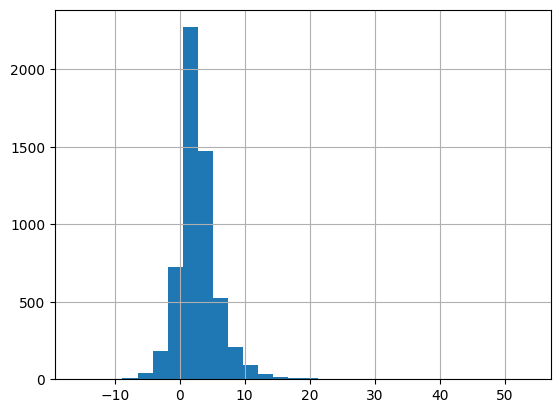

In [20]:
BooksDF2["marginBLU"].hist(bins=30)
print(BooksDF2["marginBLU"].describe())
BooksDF2.to_csv("BooksDF.csv",index=False)


OverallTimeSpanDays=(BooksDF2["sell_date"].max()-BooksDF2["purchase_date"].min()).days
OverallTimeSpanYears=OverallTimeSpanDays/365.25
TotalMarginsUSD=BooksDF2["marginUSD"].sum()
TotalMarginsBLU=BooksDF2["marginBLU"].sum()
print("Total margins in USD: ",TotalMarginsUSD)
print("Total margins in BLU: ",TotalMarginsBLU)
print("Total years in operation: ",OverallTimeSpanYears)
print("Margins (BLU) per year: ", TotalMarginsBLU/OverallTimeSpanYears)

cpltcond=BooksDF2["complete"]==True
OverallTimeSpanDaysNImpu=(BooksDF2.loc[ cpltcond ,"sell_date"].max()\
            -BooksDF2.loc[cpltcond,"purchase_date"].min()).days
OverallTimeSpanYearsNImpu=OverallTimeSpanDaysNImpu/365.25
TotalMarginsUSDNImpu=BooksDF2.loc[cpltcond,"marginUSD"].sum()
TotalMarginsBLUNImpu=BooksDF2.loc[cpltcond,"marginBLU"].sum()
print("Total margins in USD (NonImputed): ",TotalMarginsUSDNImpu)
print("Total margins in BLU (NonImputed): ",TotalMarginsBLUNImpu)

print("Total years in operation (NonImputed): ",OverallTimeSpanYearsNImpu)
print("Margins (BLU) per year (NonImputed): ", TotalMarginsBLUNImpu/OverallTimeSpanYearsNImpu)
TotalMarginsATTS=BooksDF2["profitATTS_BLU"].sum()
print("Total margins ATTS in BLU: ", TotalMarginsATTS )


<AxesSubplot:>

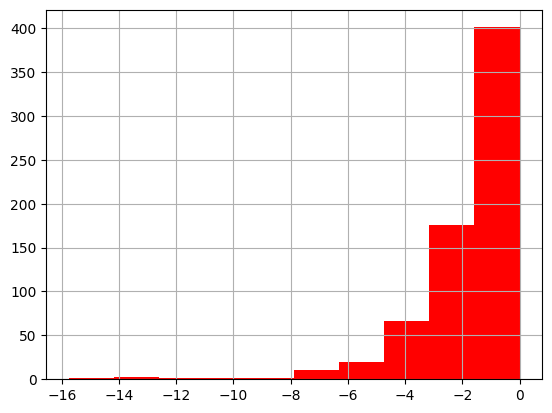

In [21]:
cond=(BooksDF2["marginBLU"]<0.0) & ( BooksDF2["complete"]==True)
BooksDF2.loc[cond,"marginBLU"].hist(color="red")



<AxesSubplot:>

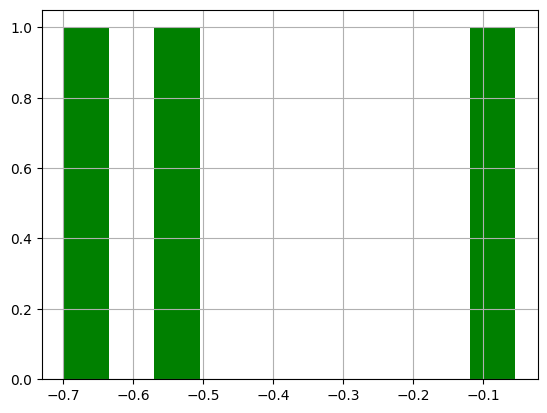

In [22]:
cond=(BooksDF2["marginBLU"]<0.0) & ( BooksDF2["complete"]==False)
BooksDF2.loc[cond,"marginBLU"].hist(color="green")

## Distributions




In [23]:
print(list(BooksDF2.columns))

['id', 'purchase_date', 'sell_date', 'days_held', 'author', 'title', 'price_bought', 'price_sold', 'profit', 'customer', 'days_held_log', 'complete', 'USDprice@purchase', 'USDprice@sell', 'price_bought_USD', 'price_sold_USD', 'marginUSD', 'BLUprice@purchase', 'BLUprice@sell', 'price_bought_BLU', 'price_sold_BLU', 'marginBLU', 'profitATTS_BLU']


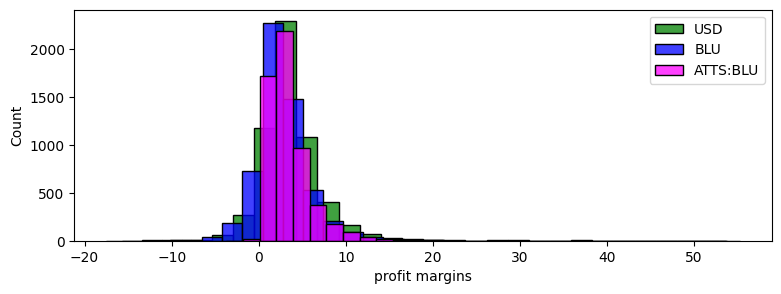

In [24]:
figMargDist, (ax1) = plt.subplots(1, 1,figsize=(9,3))
sns.histplot( BooksDF2["marginUSD"], bins=30, color="green",ax=ax1,label="USD")
sns.histplot( BooksDF2["marginBLU"], bins=30, color="blue",ax=ax1,label="BLU")
sns.histplot( BooksDF2["profitATTS_BLU"], bins=30, color="magenta",ax=ax1,label="ATTS:BLU")
ax1.set_xlabel("profit margins")
ax1.legend()
plt.show()

In [25]:
for col in ["marginUSD", "marginBLU","profitATTS_BLU"]:

    print("------------- ", col," ---------------")
    print("The mean ",col," is :")
    print(BooksDF2[col].mean())
    print("The standard deviation of ",col," is")
    print(BooksDF2[col].std())

print(" ")
print("Note that profitATTS_BLU departs significantly from a normal distribution,\
therefore it is not true that 68, 95 and 99.7% percent of the values will fall \
within one, two and three standard deviations")



-------------  marginUSD  ---------------
The mean  marginUSD  is :
3.6582871499791034
The standard deviation of  marginUSD  is
3.650476966797674
-------------  marginBLU  ---------------
The mean  marginBLU  is :
2.7587900081832197
The standard deviation of  marginBLU  is
3.4086375396232165
-------------  profitATTS_BLU  ---------------
The mean  profitATTS_BLU  is :
3.512628717424206
The standard deviation of  profitATTS_BLU  is
2.8993811330513948
 
Note that profitATTS_BLU departs significantly from a normal distribution,therefore it is not true that 68, 95 and 99.7% percent of the values will fall within one, two and three standard deviations


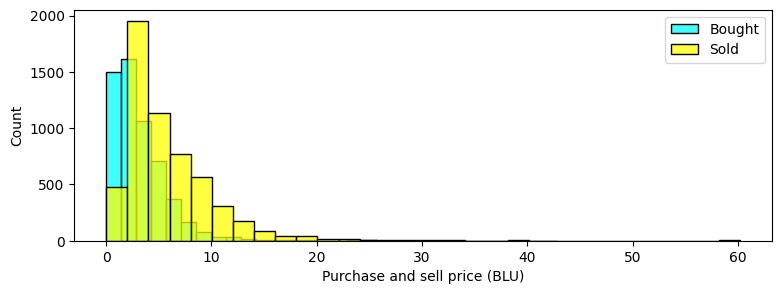

The average purchase price is (BLU) 3.078328704012019
The average sell price is (BLU) 5.837118712195237


In [26]:
figPriceDist, (ax1) = plt.subplots(1, 1,figsize=(9,3))
sns.histplot( BooksDF2["price_bought_BLU"], bins=30, color="cyan",ax=ax1,label="Bought")
sns.histplot( BooksDF2["price_sold_BLU"], bins=30, color="yellow",ax=ax1,label="Sold")
ax1.set_xlabel("Purchase and sell price (BLU)")
ax1.legend()
plt.show()

print("The average purchase price is (BLU)",BooksDF2["price_bought_BLU"].mean())
print("The average sell price is (BLU)",BooksDF2["price_sold_BLU"].mean())

The seller employs the Cost Recovery Method when ascribing purchase costs, i.e., the cost of buying a batch of books will be largely spread over the first ones sold, in order reach the break-even point as early as possible. As such, the purchase values are not an even decomposition of the whole-bulk price over each individual book, but some imputed value assuming a sale at a reduced profit before the break-even point, needing to account for zero costs beyond that. The books sold beyond the break-even point may show deceptively good profits. Therefore, the purchase costs at the individual level should not be read into too much. 

The seller had  944  sold near the break-even point
The seller had  893  books sold after the break-even point.


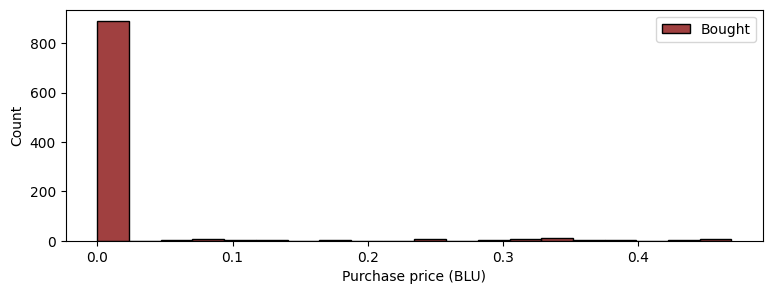

In [27]:
## gifts in either direction?

condi=BooksDF2["price_bought_BLU"]<0.50
condi2=BooksDF2["price_bought_BLU"]<0.05
ctGiftTo=BooksDF2.loc[condi,"price_bought_BLU"].count()
print("The seller had ",ctGiftTo , " sold near the break-even point")
ctGiftTo=BooksDF2.loc[condi2,"price_bought_BLU"].count()
print("The seller had ",ctGiftTo , " books sold after the break-even point.")
figPriceDist, (ax1) = plt.subplots(1, 1,figsize=(9,3))
sns.histplot( BooksDF2.loc[condi,"price_bought_BLU"], bins=20, color="maroon",ax=ax1,label="Bought")
ax1.set_xlabel("Purchase price (BLU)")
ax1.legend()
plt.show()

The seller gave away  6  books at nearly gift rates.
The seller gave away  2  books as gifts.


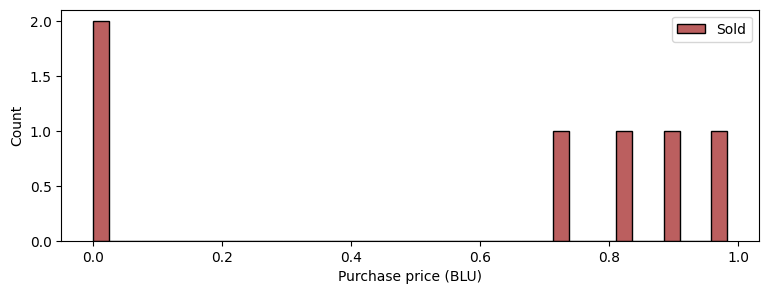

In [28]:
## gifts in either direction?

condi=(BooksDF2["price_sold_BLU"]<1.00) & (BooksDF2["marginBLU"]<0.001)
condi2=(BooksDF2["price_sold_BLU"]<0.05)   & (BooksDF2["marginBLU"]<0.001)
condi3=BooksDF2["price_sold_BLU"]<0.05
ctGiftBy=BooksDF2.loc[condi,"price_sold_BLU"].count()
print("The seller gave away ",ctGiftBy , " books at nearly gift rates.")
ctGiftBy=BooksDF2.loc[condi2,"price_sold_BLU"].count()
print("The seller gave away ",ctGiftBy , " books as gifts.")
figPriceDist, (ax1) = plt.subplots(1, 1,figsize=(9,3))
sns.histplot( BooksDF2.loc[condi,"price_sold_BLU"], bins=40, color="brown",ax=ax1,label="Sold")
ax1.set_xlabel("Purchase price (BLU)")
ax1.legend()
plt.show()

Not much reading into *zero-cost books* should be carried out. The seller has provided some details about the way he processes the prices. He practices the Cust Recovery Method: often times he buys books in bulk, and as a way of knowing when he is above water he ascribes the purchase cost to the first books he sells, to the point where he know he has recovered his expenditure. From there on, he lists the purchase cost of the rest of the bulk as zero, knowing that any sells from that point on constitute his profits.

He trades part of the bulk with book stores for other books, minimizing best-seller titles and aiming for more niche content, for which literature students and academics create demand. 

In [99]:
## very critical question. How much of the profits came from books gifted to the seller?
## How much did not? 

TotalBooks=BooksDF2["days_held"].count() ## just to get a total book number.

condi=BooksDF2["price_bought_BLU"]<0.50
condi2=BooksDF2["price_bought_BLU"]<0.05
marginGift=BooksDF2.loc[condi,"marginBLU"].sum()
print("The seller has made a total of ",marginGift , \
      "BLU out of books sold near the break-even point in the Cost Recovery Method.")
marginTruGift=BooksDF2.loc[condi2,"marginBLU"].sum()
print("The seller has made ",marginTruGift , " BLU from post break-even books")
print("Out of the total profits in BLU, ", \
      100*marginTruGift/TotalMarginsBLU ,"% came the from ")
print(100*ctGiftTo/TotalBooks ,\
      "% of the books post break-even within the Cost Recovery paradigm.")




The seller has made a total of  4423.916750849684 BLU out of books sold near the break-even point in the Cost Recovery Method.
The seller has made  4274.210984945003  BLU from post break-even books
Out of the total profits in BLU,  27.602109188795012 % came the from 
15.909495813290576 % of the books post break-even within the Cost Recovery paradigm.


## Aggregations

We are going to employ different types of aggregations.

The seller has stated that during January, June and July the sell volume should dip because he spends those months away from the city where he conducts his business, taking at most a few books with him that he can resell elsewhere. 

### Most sold titles

There are  2939  different titles


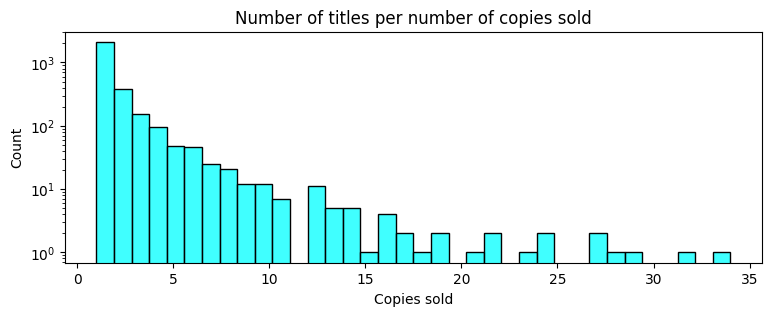

The following list includes titles that have been sold more than 10 times
title
La insoportable levedad del ser        34
Un mundo feliz                         32
1984                                   29
Fahrenheit 451                         28
La naranja mecánica                    27
Rayuela                                27
El extranjero                          24
Crónicas marcianas                     24
La peste                               23
La mujer rota                          22
El beso de la mujer araña              22
La náusea                              21
El hombre ilustrado                    19
El túnel                               19
La metamorfosis                        18
El lobo estepario                      17
Viaje al fin de la noche               17
Alguien voló sobre el nido del cuco    16
El señor de las moscas                 16
El nombre de la rosa                   16
Cuentos completos                      16
El evangelio según Jesucristo         

In [30]:
ByTitle=BooksDF2[["id","title"]].groupby(by="title").count()
ByTitle.sort_values("id",ascending=False,inplace=True)
ByTitle.head(20)
print("There are ", ByTitle.shape[0], " different titles")
#print("The 20 most highly sold titles are")
#print(ByTitle.head(20))


#ByTitle.hist()
#TitlesByCopiesSold=ByTitle.groupby(id).count()
#print(TitlesByCopiesSold.head())
figPriceDist, (ax1) = plt.subplots(1, 1,figsize=(9,3))
ax1.set_title("Number of titles per number of copies sold")
sns.histplot( ByTitle["id"], bins=36, color="cyan",ax=ax1,\
             log_scale=(False,10))
ax1.set_xlabel("Copies sold")
#ax1.legend()
plt.show()



print("The following list includes titles that have been sold more than 10 times")
cond0=ByTitle["id"]>10
#ByTitle.loc[cond0,"id"]
print(ByTitle.loc[cond0,"id"])





### Income per title

Next we explore the total income per title. Considering that the purchase price may not be a reliable value, we use the sell price and not the profit margins as the primary defining quantity in order to establish which titles were the heaviest contributors (be it by individual value or by sales number or both). 

The 20 highest grossing titles are
                                 price_sold_BLU
title                                          
Rayuela                              268.591259
La insoportable levedad del ser      262.883378
Fahrenheit 451                       197.660107
Adán Buenosayres                     194.847673
Flash                                185.705531
Un mundo feliz                       178.828263
1984                                 171.645994
Viaje al fin de la noche             160.493751
Cuentos completos                    158.861912
La naranja mecánica                  155.390410
Crónicas marcianas                   153.209457
En el camino                         138.228216
Ulises                               135.881666
Papillon                             132.176255
La mujer rota                        129.340995
El hombre ilustrado                  123.710037
El extranjero                        119.450177
La peste                             117.841376
El be

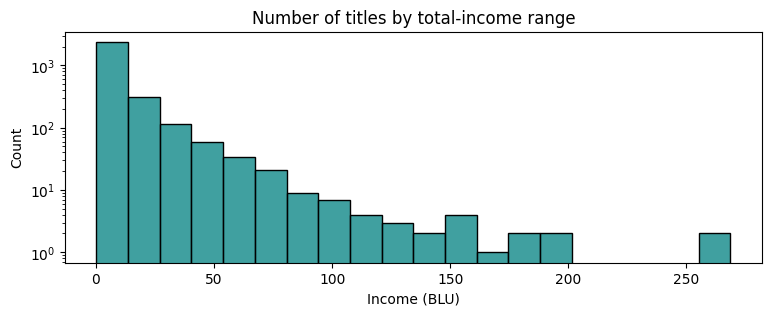

In [31]:
BLUTitle=BooksDF2[["title","price_sold_BLU"]].groupby(by="title").sum()
BLUTitle.sort_values("price_sold_BLU",ascending=False,inplace=True)
BLUTitle.head(20)
#print("There are ", ByTitle.shape[0], " different titles")
print("The 20 highest grossing titles are")
print(BLUTitle.head(30))

figGross, (ax1) = plt.subplots(1, 1,figsize=(9,3))
ax1.set_title("Number of titles by total-income range")
sns.histplot( BLUTitle["price_sold_BLU"], bins=20, color="teal",ax=ax1,\
             log_scale=(False,10))
ax1.set_xlabel("Income (BLU)")
#ax1.legend()
plt.show()

The 20 highest priced sells
                                                  price_sold_BLU
title                                                           
En Busca Del Tiempo Perdido                            60.212360
El señor de los anillos (ilustrado por Alan Lee)       55.466583
Enciclopedia ilustrada del cine                        53.362400
La Voluntad I, II y III                                49.706024
La antigüedad del hombre en el plata                   39.571014
La triología de la crucifixión rosada                  37.153197
Historias de Terramar 4 tomos                          36.070017
Relatos I y II                                         33.609895
El hombre sin atributos                                30.965191
Tetralogía de la Fundación                             29.857112
La razón feminista I y II                              28.764034
Fluyan mis lágrimas, dijo el policía                   28.193383
La crucifixión rosa                                    27.3040

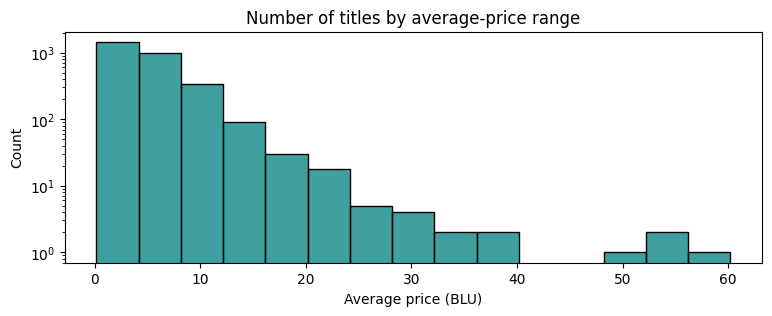

In [32]:
BLUTitleAVG=BooksDF2[["title","price_sold_BLU"]].groupby(by="title").mean()
BLUTitleAVG.sort_values("price_sold_BLU",ascending=False,inplace=True)
BLUTitleAVG.head(20)
#print("There are ", ByTitle.shape[0], " different titles")
print("The 20 highest priced sells")
print(BLUTitleAVG.head(30))

figGross, (ax1) = plt.subplots(1, 1,figsize=(9,3))
ax1.set_title("Number of titles by average-price range")
sns.histplot( BLUTitleAVG["price_sold_BLU"], bins=15, color="teal",ax=ax1,\
             log_scale=(False,10))
ax1.set_xlabel("Average price (BLU)")
#ax1.legend()
plt.show()

As seen in the above figure, most of the sales take place in the <10 BLU range. 

In [71]:
TitleHold=BooksDF2[["title","days_held","price_sold_BLU","marginBLU"]]\
.groupby(by="title").mean()
TitleHold.sort_values(["days_held", "price_sold_BLU" ],ascending=False,inplace=True)
TitleHold.head(20)
#print("There are ", ByTitle.shape[0], " different titles")
print("The 20 longest held titles and average sell price (BLU)")
print(TitleHold.head(20))
print("   ")
TitleHold.sort_values(["days_held", "price_sold_BLU" ],ascending=[True,False],inplace=True)
TitleHold.head(20)
print("The 20 most briefly held titles and average sell price (BLU)")
print(TitleHold.head(20))

print(" ")
print("The 15 most briefly held titles with highest average sell\
price (BLU) AND above average selling price (>6 BLU) :")
crit1=TitleHold["price_sold_BLU"]>6.0
print(TitleHold.loc[crit1,["days_held", "price_sold_BLU","marginBLU" ]].head(15))



The 20 longest held titles and average sell price (BLU)
                                           days_held  price_sold_BLU  \
title                                                                  
Historia de las cruzadas                      2909.0        1.149898   
El americano tranquilo                        2859.0        1.476340   
La hoguera de las encinas                     2670.0        1.990519   
Sangre española                               2488.0        1.718723   
Peces de colores                              2454.0        0.814978   
El día de la creación                         2385.0        4.113352   
Bay City Blues                                2333.0        0.906069   
Juvenilia                                     2254.0        0.158676   
Amos de títeres                               2190.0        2.205431   
Noches de la antigüedad                       2188.0        2.297955   
Deuda de honor                                2140.0        1.280348   
Pavana  

The seller showed interest in a specific combination: shortest-time held and most sold. There were not many titles that did comply satisfactorily with both constraints. In order to make a sizeable list the conditions were: at least sold four times and held for less than 45 days. 

In [81]:
TitleHold2=BooksDF2[["title","days_held","price_sold_BLU"]]\
.groupby(by="title").mean()

TitleIDct=BooksDF2[["title","id"]]\
.groupby(by="title").count()
TitleHeldCount=TitleHold2.merge(TitleIDct,\
    left_on="title",right_on="title", how="left",suffixes=("l","r")\
        , left_index=False, right_index=False)
TitleHeldCount.sort_values(["id","days_held" ],ascending=(False,True),inplace=True)
TitleHeldCount.head(20)
#TitleHeldCount["ct/dh"]=TitleHeldCount["id"]/np.log10(TitleHeldCount["days_held"]**2+1.0)

print(" ")
print("Most briefly-held (average) and most-times-sold combinations :")
#TitleHeldCount.sort_values(["ct/dh","id","days_held" ],\
 #                          ascending=(False,False,True),inplace=True)
crit1=(TitleHeldCount["days_held"]<45) & (TitleHeldCount["id"]>4)
#print(TitleHeldCount.loc[crit1,["ct/dh","days_held", "id","price_sold_BLU" ]].head(15))
print(TitleHeldCount.loc[crit1,["id","days_held" ]].head(15))

#print(TitleHeldCount[["days_held", "id","days_held","price_sold_BLU" ]].head(15))



 
Most briefly-held (average) and most-times-sold combinations :
                                              id  days_held
title                                                      
El gran Gatsby                                 9  42.333333
Ensayo sobre la ceguera                        9  44.777778
¿Sueñan los androides con ovejas eléctricas?   8  13.625000
Crónicas del Ángel Gris                        7  27.857143
La feria de las tinieblas                      6  39.666667
Los pichiciegos                                6  42.666667
Crónicas del ángel gris                        6  44.333333
El invencible                                  5  21.000000
El ruido y la furia                            5  30.000000
Las venas abiertas de américa                  5  44.400000


### Recurring and highest-spending customers



In [34]:
print(list(BooksDF2.columns))

['id', 'purchase_date', 'sell_date', 'days_held', 'author', 'title', 'price_bought', 'price_sold', 'profit', 'customer', 'days_held_log', 'complete', 'USDprice@purchase', 'USDprice@sell', 'price_bought_USD', 'price_sold_USD', 'marginUSD', 'BLUprice@purchase', 'BLUprice@sell', 'price_bought_BLU', 'price_sold_BLU', 'marginBLU', 'profitATTS_BLU']


In [46]:
Custo=BooksDF2[["customer","price_sold_BLU","marginBLU"]].groupby(by="customer").sum()
Custo.sort_values("price_sold_BLU",ascending=False,inplace=True)
#Custo.head(20)
Custo=Custo.rename_axis("customer").reset_index()
#print("There are ", ByTitle.shape[0], " different titles")
print("The 20 highest spending customers (BLU)")
print(Custo.head(20))
print("   ")
#Custo.sort_values(["days_held", "price_sold_BLU" ],ascending=[True,False],inplace=True)
#Custo.head(20)
#print("The 20 most briefly held titles and average sell price (BLU)")
#print(TitleHold.head(20))



CustoCt=BooksDF2[["customer","id"]].groupby(by="customer").count()
CustoCt.sort_values("id",ascending=False,inplace=True)
CustoCt=CustoCt.rename_axis("customer").reset_index()
print(CustoCt.head(20))
#print(" ")
#print("The 15 most briefly held titles with highest average sell\
#price (BLU) AND above average selling price (>6 BLU) :")
#crit1=TitleHold["price_sold_BLU"]>6.0
#print(TitleHold.loc[crit1,["days_held", "price_sold_BLU","marginBLU" ]].head(15))

print("   ")
CustoAvg=BooksDF2[["customer","price_sold_BLU","marginBLU"]].groupby(by="customer").mean()
CustoAvg.sort_values("price_sold_BLU",ascending=False,inplace=True)
CustoAvg=CustoAvg.rename_axis("customer").reset_index()
CustoAvg.head(20)
print("The 20 highest per-book-spending customers (BLU)")
print(CustoAvg.head(20))

The 20 highest spending customers (BLU)
                                             customer  price_sold_BLU  \
0   eb475932c1efe36660cf85e0b71d16bb6ae8644ab96f40...      916.459644   
1   7765da6ed4733d61f51c79d7eb9ddc367b545f29a656f6...      679.994102   
2   819d8de0088659e32278b0bb884d5a2a2637da4b1c1480...      627.606962   
3   16a40baa3c5bfa59666bd96c0bdb4f2d9032a3919ab44f...      494.878965   
4   c8f34aae414b54a6296e2e8a8b0869d5dcaee250d7cd4b...      493.360078   
5   48fbe757372241a53bf535efba9f1cfb7aa4c0b8121d3e...      415.801156   
6   45bb123f51b5064a0bc2c0a981aee6e38b29b75d8d3a6d...      334.795999   
7   213b19f502913e18b294351e7d5cf2ca1ea592a35123d0...      313.726599   
8   5808aa25578ab8d85ea95bffa4052f9c2ff694bf89eac5...      281.994118   
9   bc5f0262c42f6df46cf4fb13fff8d24f9277ec23ca0544...      277.622094   
10  cd93058c341989ec74aefe24dbce7cb2228758d52ecd93...      274.501945   
11  5a024da7c20c691598fb49eaa25c811b9bdcfc3206a1d1...      264.211320   
12  bd7cded

In [36]:


print(Custo.head())
print(CustoCt.head())

CustoJoin=Custo.merge(CustoCt.reset_index(drop=True),\
    left_on="customer",right_on="customer", how="left",suffixes=("l","r")\
        , left_index=False, right_index=False)

CustoJoin=CustoJoin.merge(CustoAvg.reset_index(drop=True),\
    left_on="customer",right_on="customer", how="left",suffixes=("_tot","_avg")\
        , left_index=False, right_index=False)
#CustoJoin.drop(columns="customer",inplace=True)
#CustoJoin
#["customer"]=CustoCt.index

CustoJoin.reset_index()
print(CustoJoin.columns)
print(CustoJoin.head())

                                            customer  price_sold_BLU  \
0  eb475932c1efe36660cf85e0b71d16bb6ae8644ab96f40...      916.459644   
1  7765da6ed4733d61f51c79d7eb9ddc367b545f29a656f6...      679.994102   
2  819d8de0088659e32278b0bb884d5a2a2637da4b1c1480...      627.606962   
3  16a40baa3c5bfa59666bd96c0bdb4f2d9032a3919ab44f...      494.878965   
4  c8f34aae414b54a6296e2e8a8b0869d5dcaee250d7cd4b...      493.360078   

    marginBLU  
0  374.122853  
1  333.195683  
2  226.637964  
3   37.360715  
4  260.202748  
                                            customer   id
0  16a40baa3c5bfa59666bd96c0bdb4f2d9032a3919ab44f...  234
1  819d8de0088659e32278b0bb884d5a2a2637da4b1c1480...  144
2  eb475932c1efe36660cf85e0b71d16bb6ae8644ab96f40...  140
3  7765da6ed4733d61f51c79d7eb9ddc367b545f29a656f6...  122
4  45bb123f51b5064a0bc2c0a981aee6e38b29b75d8d3a6d...   84
Index(['customer', 'price_sold_BLU_tot', 'marginBLU_tot', 'id',
       'price_sold_BLU_avg', 'marginBLU_avg'],
      dtype=

In [387]:
from sklearn import preprocessing

print(CustoJoin.info())

def log10plus1(DF,cols):
    for col in cols:
        DF[col]=np.log10(1.0+DF[col])#np.sqrt(DF[col]) #np.log10(1.0+DF[col])
    
    return DF
ScaleCols=["price_sold_BLU_tot", "price_sold_BLU_avg","marginBLU_tot",\
                      "marginBLU_avg","id"  ]        
CustoJoinStd=CustoJoin.copy(deep=True)
CustoJoinLog=CustoJoin.copy(deep=True)
CustoJoinLog=log10plus1(CustoJoinLog,ScaleCols)

scaler=preprocessing.StandardScaler()
#CustoJoinStd=pd.DataFrame()
dataStd=\
scaler.fit_transform(CustoJoin[ScaleCols])
CustoJoinStd=pd.DataFrame(dataStd,columns=ScaleCols)
dataStd=\
scaler.fit_transform(CustoJoinLog[ScaleCols])
CustoJoinLogStd=pd.DataFrame(dataStd,columns=ScaleCols)
CustoJoinStd["customer"]=CustoJoin["customer"]
CustoJoinLog["customer"]=CustoJoin["customer"]
CustoJoinLogStd["customer"]=CustoJoin["customer"]
#CustoJoin.reset_index(inplace=True)

print("Scaler means: ",scaler.mean_)
print(CustoJoinStd.head())
#from sklearn import cluster as sklc
#cluster_labels =  sklc.KMeans(n_clusters=3, random_state=0, n_init=20)\
#.fit(CustoJoinStd[["id","price_sold_BLU_avg"]])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1143 non-null   int64  
 1   customer            1143 non-null   object 
 2   price_sold_BLU_tot  1143 non-null   float64
 3   marginBLU_tot       1143 non-null   float64
 4   id                  1143 non-null   int64  
 5   price_sold_BLU_avg  1143 non-null   float64
 6   marginBLU_avg       1143 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 62.6+ KB
None
Scaler means:  [1.18129208 0.8251592  0.88361242 0.55941055 0.57590317]
   price_sold_BLU_tot  price_sold_BLU_avg  marginBLU_tot  marginBLU_avg  \
0           15.083100            0.026757      13.262345      -0.205952   
1           11.065693           -0.226495      11.756999      -0.185996   
2           10.175667           -0.543012       7.837690      -0.578714   
3            

/home/jax/Orico/JPDataAnon/env/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [432]:
from sklearn.mixture import GaussianMixture
from collections import Counter
def reclassif(myset,nclus=2,random_state=18):
    n_clusters = nclus
    gmm_model = GaussianMixture(n_components=n_clusters,random_state=random_state)
    gmm_model.fit(myset )


    cluster_labels = gmm_model.predict(myset)
    print("cluster_labels: ")#, cluster_labels)
    ct=Counter(cluster_labels)
    print(ct.keys())
    print(ct.values())
    
    print(np.shape(myset))
#print(FullSet.df2)
#X = pd.DataFrame(X)
#X['cluster'] = cluster_labels
    print( np.shape(cluster_labels) )
    cluster_labels
#def plot_classif_reclassif(myset):
    #print("How balanced did the samples end up",np.sum(cluster_labels))
    colorvec=["r","g","b","y","c","m"]
    varLs=list(myset)

    for ivarx,varx in enumerate(varLs):
        for ivary,vary in enumerate(varLs):
            if ivary >= ivarx :
                continue
                
            figClusters, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(14,4))
            ax1.set_title("Customer clustering")
            ax2.set_title(varx+" distribution along the clusters")
            ax3.set_title(vary+" distribution along the clusters")
            ax1.set_xlabel(varx)
            ax1.set_ylabel(vary)
#ax1.legend()
            

            #for k in range(0,n_clusters):
            data =myset#[cluster_labels==k]
                #sns.histplot( ByTitle["id"], bins=36, color="cyan",ax=ax1,\
             #log_scale=(False,False))
            sns.scatterplot(data=data, x=varx,\
                 y=vary, hue=cluster_labels,style=cluster_labels,palette="deep",ax=ax1)
                #plt.scatter(data[varx],data[vary],c=colorvec[k],alpha=0.1)
                #plt.rcParams["figure.figsize"] = (4,4)
            sns.boxplot(data=data, x=cluster_labels, y=varx, ax=ax2)
            sns.boxplot(data=data, x=cluster_labels, y=vary, ax=ax3)
            

            #plt.title("Clusters Identified by Guassian Mixture Model")    
            #plt.ylabel(vary)
            #plt.xlabel(varx)
            #plt.figure(figsize=(4,4))
            #plt.rcParams["figure.figsize"] = (4,4)
            plt.show()

            

            
    return cluster_labels

cluster_labels: 
dict_keys([3, 1, 2, 0])
dict_values([58, 296, 481, 308])
(1143, 2)
(1143,)


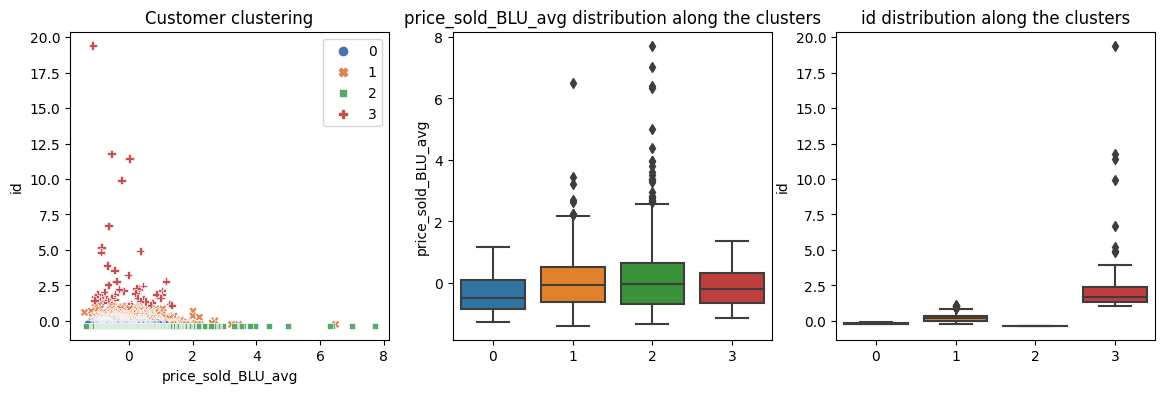

/home/jax/Orico/JPDataAnon/env/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


cluster_labels: 
dict_keys([3, 0, 2, 1])
dict_values([131, 332, 199, 481])
(1143, 2)
(1143,)


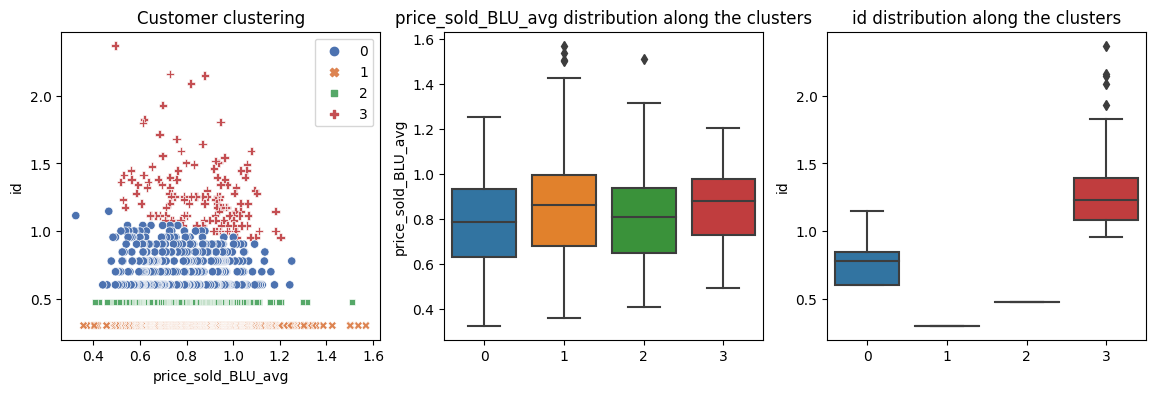

/home/jax/Orico/JPDataAnon/env/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


cluster_labels: 
dict_keys([3, 0, 2, 1])
dict_values([163, 300, 199, 481])
(1143, 2)
(1143,)


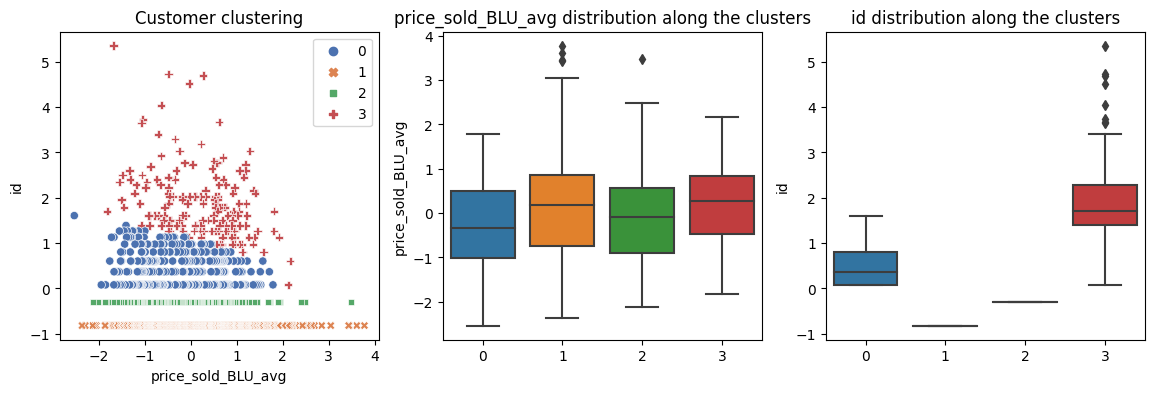

/home/jax/Orico/JPDataAnon/env/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [433]:
myset1=CustoJoinStd[["id","price_sold_BLU_tot"]]#[["id","price_sold_BLU_tot","price_sold_BLU_avg"]]#[["id","price_sold_BLU_avg"]]
myset2=CustoJoinLog[["id","price_sold_BLU_tot"]]#[["id","price_sold_BLU_tot","price_sold_BLU_avg"]]#[["id","price_sold_BLU_avg"]]
myset3=CustoJoin[["id","price_sold_BLU_tot"]]#[["id","price_sold_BLU_tot","price_sold_BLU_avg"]]
myset4=CustoJoinStd[["id","price_sold_BLU_avg"]]#[["id","price_sold_BLU_tot","price_sold_BLU_avg"]]#[["id","price_sold_BLU_avg"]]
myset5=CustoJoinLog[["id","price_sold_BLU_avg"]]#[["id","price_sold_BLU_tot","price_sold_BLU_avg"]]#[["id","price_sold_BLU_avg"]]
myset6=CustoJoin[["id","price_sold_BLU_avg"]]
myset7=CustoJoinLogStd[["id","price_sold_BLU_avg"]]
#setLs=[myset1,myset2,myset3,myset4,myset5,myset6]
setLs=[myset4,myset5,myset7]
#labelLs=[CustoJoinStd.labelvec]*len(setLs)#,FullSet.labelvec]

cluslabLs=[]
for imy,myset in enumerate(setLs):
    clab=reclassif(myset,nclus=4)
    cluslabLs.append(clab)
    myset["cluster_labels"]=clab#reclassif(myset,nclus=3)
    #myset[["customer","cluster_labels"]].to_csv("CustomerClusters/myset"\
    #                    +str(imy).zfill(2)+".csv")
    #plot_classif_reclassif(myset)

Several clustering approaches were tried. We focused on three variables, of which two are linearly independent, *price_sold_BLU_tot*, *id*, *price_sold_BLU_avg*, the total revenue per customer, the number of units acquired by a customer and the average price of their purchases. This was narrowed to *id* and *price_sold_BLU_avg*. The data in terms of the average price and number of variables does not present a clear-cut separation or groupings as all variables are single modal. This suggests that the best strategy is to use just the total revenue or the item count as the single clustering variable. The clustering was attempted using the base-10 logarithm of the variables, standardizing (after the logarithm makes the distributions appear normal in shape).

In order to keep the number of customer cohorts small for the seller, we used four clusters, and obtained the following. There is an elite group that orders the most volume and have a slightly higher average purchase price. Then there are the one-off buy, characterized by making a single purchase and dissappearing. Then there is the two-purchases segment and there is an intermediate group, that has acquired from two to ten books.

## Time-based insights

The goal here is to explore how sells evolve over time, which months involve more activity and how the business changed over the years.

As supplemental information we introduce the Argentinian GDP. 

Index(['Year', 'GDP', 'GDPpc', 'Growth'], dtype='object')
   Year     GDP  GDPpc  Growth
0  2021  487.23  10636   10.40
1  2020  385.54   8496   -9.94
2  2019  447.75   9964   -2.00
3  2018  524.82  11795   -2.62
4  2017  643.63  14613    2.82


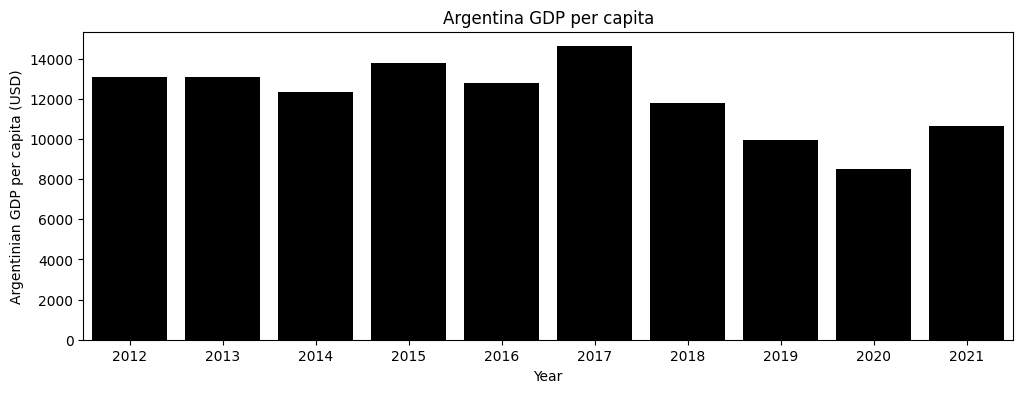

In [40]:
ArgGDP=pd.read_csv("ArgGDP.txt")
print(ArgGDP.columns)
print(ArgGDP.head())


figArgGDP, (ax1) = plt.subplots(1, 1,figsize=(12,4))
ax1.set_title("Argentina GDP per capita")
#ax2.set_title("Yearly Investments")

ArgGDP12=ArgGDP.loc[ArgGDP["Year"]>2011]
sns.barplot( ArgGDP12,x="Year",y="GDPpc",  color="black",ax=ax1,\
            )

ax1.set_xlabel("Year")
ax1.set_ylabel("Argentinian GDP per capita (USD)")
#ax1.legend()
plt.show()

In [113]:
timeDF=BooksDF2.copy(deep=True)
timeDF["purchase_date"]=pd.to_datetime(timeDF["purchase_date"])
timeDF.set_index("id",inplace=True)
timeDF["sell_date"]=pd.to_datetime(timeDF["sell_date"])
timeDF["sell_year"]=timeDF["sell_date"].dt.year
timeDF["buy_year"]=timeDF["purchase_date"].dt.year
timeDF["sell_month"]=timeDF["sell_date"].dt.month
timeDF["buy_month"]=timeDF["purchase_date"].dt.month
#yearDF.set_index("sell_date",inplace=True)
print(timeDF.tail())


     purchase_date  sell_date  days_held                      author  \
id                                                                     
5609    2017-05-25 2021-12-17       1667                Kafka, Franz   
5610    2021-11-15 2021-12-17         32             Rimbaud, Arthur   
5611    2021-11-02 2021-12-17         45              Hesse, Hermann   
5612    2021-11-15 2021-12-30         45  Strugatski, Arkadi y Boris   
5613    2021-11-18 2022-01-03         46              Carroll, Lewis   

                                    title  price_bought  price_sold  profit  \
id                                                                            
5609                              América          30.0       500.0   470.0   
5610                               Poesía         350.0       450.0   100.0   
5611                               Demian         460.6       800.0   339.4   
5612                Picnic extraterrestre         500.0      2000.0  1500.0   
5613  Alicia en el pa

The yearly income and profits were:
    sell_year  price_sold_BLU    marginBLU
0        2012      248.599069    94.286534
1        2013      448.994088   181.805456
2        2014      814.627052   379.173509
3        2015     2934.475964  1562.645801
4        2016     5487.248791  3200.377078
5        2017     5856.950733  3347.549556
6        2018     5357.088633  2328.074602
7        2019     4272.432042  1872.791993
8        2020     3742.683794   829.249999
9        2021     3596.864761  1687.398993
10       2022        3.782405     1.734794
The yearly investment was:
   buy_year  price_bought_BLU
0      2012        155.221605
1      2013        267.188631
2      2014        540.449300
3      2015       2169.508077
4      2016       4094.769177
5      2017       3383.507237
6      2018       2965.760172
7      2019       1536.363172
8      2020       1180.085423
9      2021        985.806221


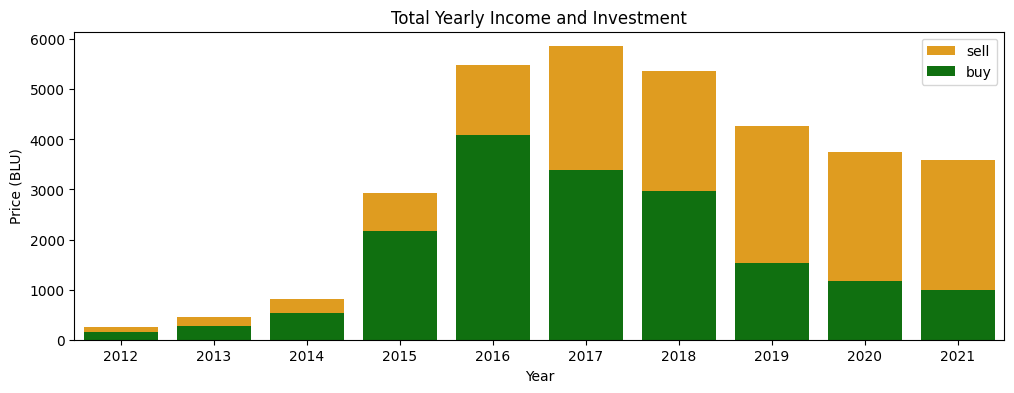

Total purchases, sells, profits : 17278.659015619458 32763.747331551873 15485.088315932413
Consistency check (Prof-Sell+Purch=0) :  0.0


In [114]:
yearbuyDF=timeDF.groupby("buy_year").sum()
yearbuyDF.reset_index(inplace=True)

yearsellDF=timeDF.groupby("sell_year").sum()
#yearsellDF["sell_year"]=yearsellDF.index
yearsellDF.reset_index(inplace=True)


print("The yearly income and profits were:")
print(yearsellDF[["sell_year","price_sold_BLU","marginBLU"]])
print("The yearly investment was:")
print(yearbuyDF[["buy_year","price_bought_BLU"]])

figYearly, (ax1) = plt.subplots(1, 1,figsize=(12,4))
ax1.set_title("Total Yearly Income and Investment")
#ax2.set_title("Yearly Investments")


sns.barplot( yearsellDF,x="sell_year",y="price_sold_BLU",  color="orange",ax=ax1,\
           label="sell"  )
sns.barplot( yearbuyDF, x="buy_year",y="price_bought_BLU",  color="green",ax=ax1,\
          label="buy" )
ax1.set_xlabel("Year")
ax1.set_ylabel("Price (BLU)")
ax1.legend()
plt.show()

sumPurch=yearbuyDF["price_bought_BLU"].sum() ; sumSell=yearsellDF["price_sold_BLU"].sum() ; sumProf=yearsellDF["marginBLU"].sum();
print("Total purchases, sells, profits :", sumPurch,sumSell,sumProf)
print("Consistency check (Prof-Sell+Purch=0) : ",sumProf-sumSell+sumPurch)

The yearly evolution shows a very significant growth, parabolic growth from 2012 to 2016, roughly stabilizing between 2016 to 2018, and settling at a lower plateau from 2019 to 2021. 

There appears to be some carryover from the investments of one year into the following ones, as suggested by the increased margins in 2019-2021 despite the lower investment. The lower investment may also indicate a better bargaining ability when making bulk purchases and the better picking of trades with book stores. 

The Argentinian GDP from 2018 to 2020 experienced a decline, which implies less available money per person, therefore on average there was less disposable income to spend on items such as books. The Covid pandemic years 2020 and 2021 and the restrictions put in place in Argentina can also account for the slowdown of overall activity, althought this will be reviewed later when we examine the number of transactions over the years. 

In order to understand whether there is some carryover effect or whether the seller has increased his per-sale margins, we take a look at the yearly averages next. 

The yearly income and profits were:
    sell_year  price_sold_BLU  marginBLU
0        2012        6.214977   2.357163
1        2013        7.610069   3.081448
2        2014        5.989905   2.788041
3        2015        8.219821   4.377159
4        2016        9.781192   5.704772
5        2017        9.477267   5.416747
6        2018        7.058088   3.067292
7        2019        5.056133   2.216322
8        2020        2.923972   0.647852
9        2021        3.758479   1.763217
10       2022        3.782405   1.734794
The yearly investment was:
   buy_year  price_bought_BLU
0      2012          3.695753
1      2013          4.528621
2      2014          2.785821
3      2015          3.609830
4      2016          4.034255
5      2017          4.121202
6      2018          3.505627
7      2019          2.127927
8      2020          1.451520
9      2021          1.971612


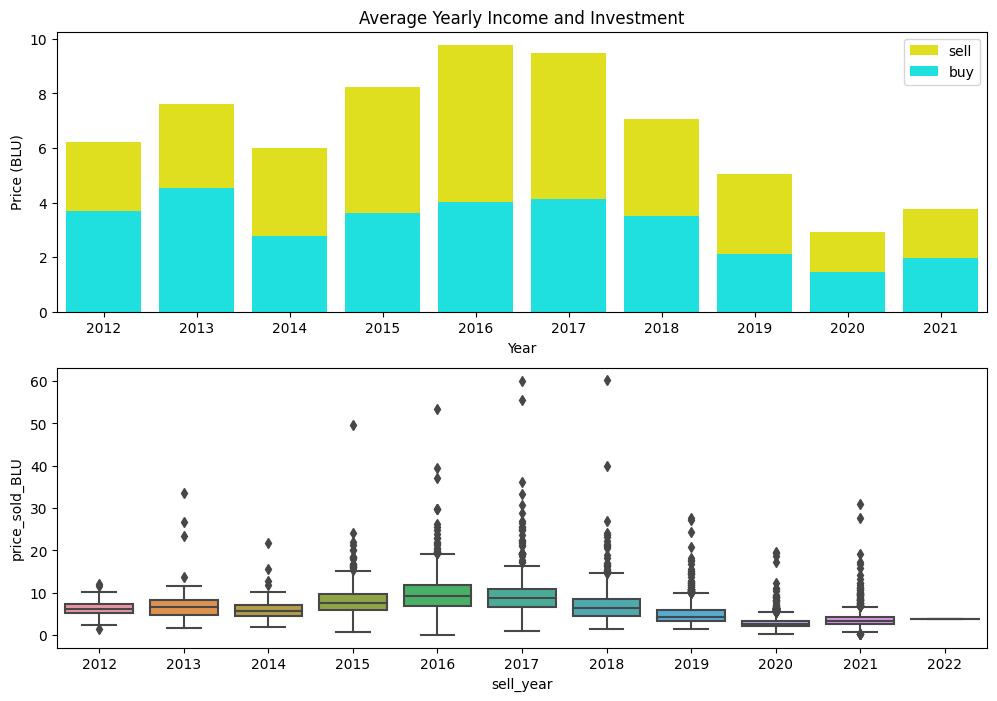

In [115]:

yearbuyDF=timeDF.groupby("buy_year").mean()
yearbuyDF.reset_index(inplace=True)

yearsellDF=timeDF.groupby("sell_year").mean()
#yearsellDF["sell_year"]=yearsellDF.index
yearsellDF.reset_index(inplace=True)


print("The yearly income and profits were:")
print(yearsellDF[["sell_year","price_sold_BLU","marginBLU"]])
print("The yearly investment was:")
print(yearbuyDF[["buy_year","price_bought_BLU"]])

figYearlyAVG, (ax1,ax2) = plt.subplots(2, 1,figsize=(12,8))
ax1.set_title("Average Yearly Income and Investment")
#ax2.set_title("Yearly Investments")


sns.barplot( yearsellDF,x="sell_year",y="price_sold_BLU",  color="yellow",ax=ax1,\
           label="sell"  )
sns.barplot( yearbuyDF, x="buy_year",y="price_bought_BLU",  color="cyan",ax=ax1,\
          label="buy" )

sns.boxplot(data=timeDF, x="sell_year", y="price_sold_BLU", ax=ax2)

ax1.set_xlabel("Year")
ax1.set_ylabel("Price (BLU)")
#ax1.set_ylabel("Price (BLU)")
ax1.legend()
plt.show()



The average income in 2020 and 2021 is about twice the average spending, whereas the total income more than doubles the total investment. Therefore, it is likely that 2020 and 2021 benefit from previous-years acquisitions. The best average sell prices ocurred in 2016 and 2017. 

The seller was specially interested in the number of sells per year as a performance indicator.

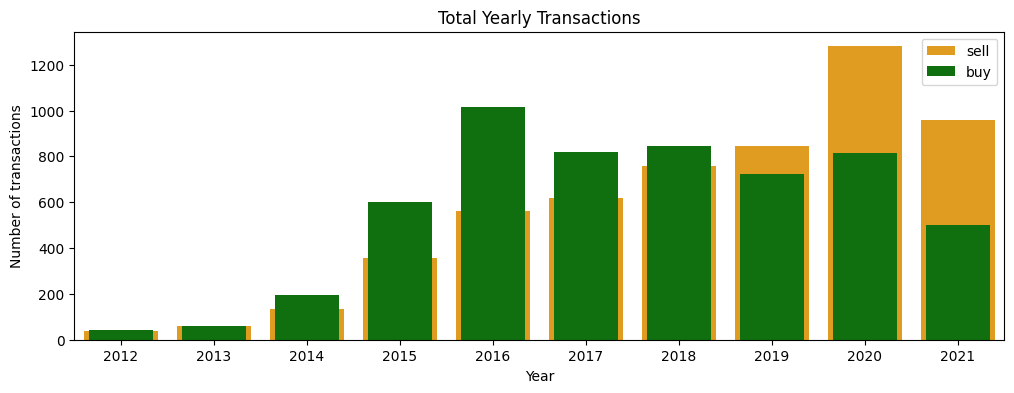

In [145]:
bnumDF=timeDF.groupby("buy_year").count()#
bnumDF.reset_index(inplace=True)
#print(bnumDF.head(2))
#yearbuyDF["buy_number"]=bnumDF#bnumDF.reset_index(inplace=True)
#yearbuyDF = yearbuyDF.merge(bnumDF, on="buy_year")

snumDF=timeDF.groupby("sell_year").count()#.reset_index(inplace=True)
snumDF.reset_index(inplace=True)
#print(snumDF.head(2))
#yearsellDF["sell_number"]=snumDF
#snumDF.reset_index(inplace=True)


figYearly, (ax1) = plt.subplots(1, 1,figsize=(12,4))
ax1.set_title("Total Yearly Transactions")
#ax2.set_title("Yearly Investments")


sns.barplot( snumDF,x="sell_year",y="sell_date",  color="orange",ax=ax1,\
           label="sell"  )
sns.barplot( bnumDF, x="buy_year",y="purchase_date",  color="green",ax=ax1,\
          label="buy",width=0.68 )
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of transactions")
ax1.legend()
plt.show()



The year-to-year transaction count confirms that there is an apparent net stock contribution from 2015-2018 that is being sold over the 2019-2021 period. The acquisition rate has been relatively steady from 2016 to 2020, seeing a dip in 2021. 
The selling activity has stadily increased until 2020, which was a pandemic year which had less overall economic activity. The number of sales in 2020 were the vendor's historical highs, however, the income in BLU was one of the lowest. This can be attributed by Argentina's currency losing value. 

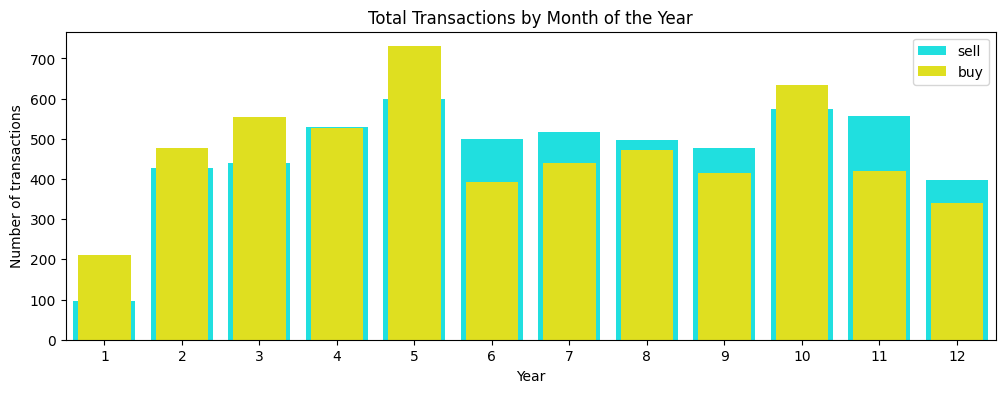

In [475]:
bnumDF=timeDF.groupby("buy_month").count()#
bnumDF.reset_index(inplace=True)
#print(bnumDF.head(2))
#yearbuyDF["buy_number"]=bnumDF#bnumDF.reset_index(inplace=True)
#yearbuyDF = yearbuyDF.merge(bnumDF, on="buy_year")

snumDF=timeDF.groupby("sell_month").count()#.reset_index(inplace=True)
snumDF.reset_index(inplace=True)
#print(snumDF.head(2))
#yearsellDF["sell_number"]=snumDF
#snumDF.reset_index(inplace=True)


figYearly, (ax1) = plt.subplots(1, 1,figsize=(12,4))
ax1.set_title("Total Transactions by Month of the Year")
#ax2.set_title("Yearly Investments")


sns.barplot( snumDF,x="sell_month",y="sell_date",  color="cyan",ax=ax1,\
           label="sell"  )
sns.barplot( bnumDF, x="buy_month",y="purchase_date",  color="yellow",ax=ax1,\
          label="buy",width=0.68 )
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of transactions")
ax1.legend()
plt.show()



### Next we explore the yearly cycle over the months. 

The monthly income and profits were:
    sell_month  price_sold_BLU    marginBLU
0            1      473.408479   243.811772
1            2     2966.151561  1543.116036
2            3     3032.941696  1506.013040
3            4     3187.204806  1678.821152
4            5     3397.117173  1729.021390
5            6     2619.513965  1249.048645
6            7     2839.165557  1244.827543
7            8     2775.490582  1157.943380
8            9     2488.948469  1109.586026
9           10     3324.236504  1502.603087
10          11     3319.296922  1468.378407
11          12     2340.271619  1051.917838
The monthly investment was:
    buy_month  price_bought_BLU
0           1        583.656738
1           2       1776.157945
2           3       1628.244982
3           4       1422.864520
4           5       1625.771007
5           6       1252.348585
6           7       1284.290972
7           8       1724.699937
8           9       1420.943290
9          10       2440.578729
10         

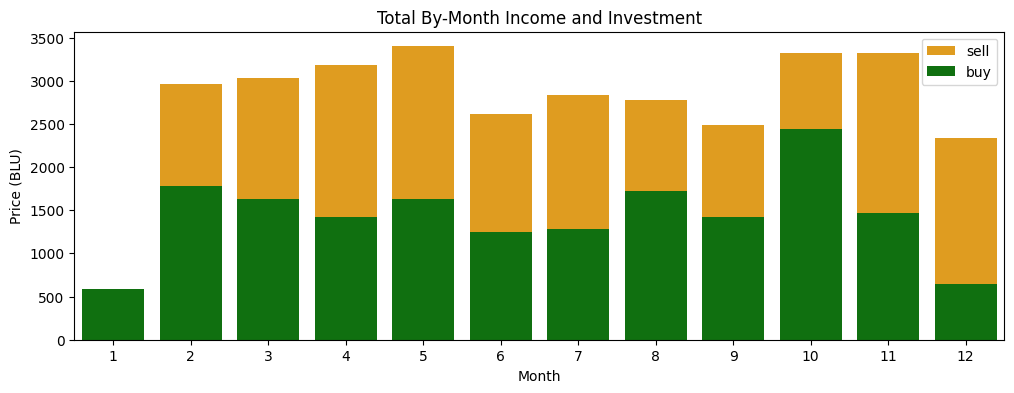

Total purchases, sells, profits : 17278.659015619458 32763.74733155187 15485.088315932411
Consistency check (Prof-Sell+Purch=0) :  0.0


In [44]:
monthbuyDF=timeDF.groupby("buy_month").sum()
monthbuyDF.reset_index(inplace=True)

monthsellDF=timeDF.groupby("sell_month").sum()
#monthsellDF["sell_month"]=monthsellDF.index
monthsellDF.reset_index(inplace=True)


print("The monthly income and profits were:")
print(monthsellDF[["sell_month","price_sold_BLU","marginBLU"]])
print("The monthly investment was:")
print(monthbuyDF[["buy_month","price_bought_BLU"]])

figYearly, (ax1) = plt.subplots(1, 1,figsize=(12,4))
ax1.set_title("Total By-Month Income and Investment")
#ax2.set_title("Yearly Investments")


sns.barplot( monthsellDF,x="sell_month",y="price_sold_BLU",  color="orange",ax=ax1,\
           label="sell"  )
sns.barplot( monthbuyDF, x="buy_month",y="price_bought_BLU",  color="green",ax=ax1,\
          label="buy" )
ax1.set_xlabel("Month")
ax1.set_ylabel("Price (BLU)")
ax1.legend()
plt.show()

sumPurch=monthbuyDF["price_bought_BLU"].sum() ; sumSell=monthsellDF["price_sold_BLU"].sum() ; sumProf=monthsellDF["marginBLU"].sum();
print("Total purchases, sells, profits :", sumPurch,sumSell,sumProf)
print("Consistency check (Prof-Sell+Purch=0) : ",sumProf-sumSell+sumPurch)

The seller has been fairly regular over the months, setting aside the vacation periods he takes during December/January and June/July. The data suggests that during the summer vacation (Southern hemisphere, therefore December/January) the seller spends more days than during the winter recess. 

## Inventory tracking



    sell_year  buy_year  price_sold_BLU
20       2019      2017      413.186988
21       2019      2018     1244.497891
22       2019      2019     2198.208970
23       2020      2012        2.626238
24       2020      2014       17.834407
25       2020      2015       84.178727
26       2020      2016      207.840089
27       2020      2017      305.541581
28       2020      2018      468.727843
29       2020      2019      853.071861
30       2020      2020     1802.863049
31       2021      2014        6.362528
32       2021      2015       15.980240
33       2021      2016      102.286260
34       2021      2017      123.816604
35       2021      2018      123.873312
36       2021      2019      229.388502
37       2021      2020      842.030416
38       2021      2021     2153.126900
39       2022      2021        3.782405


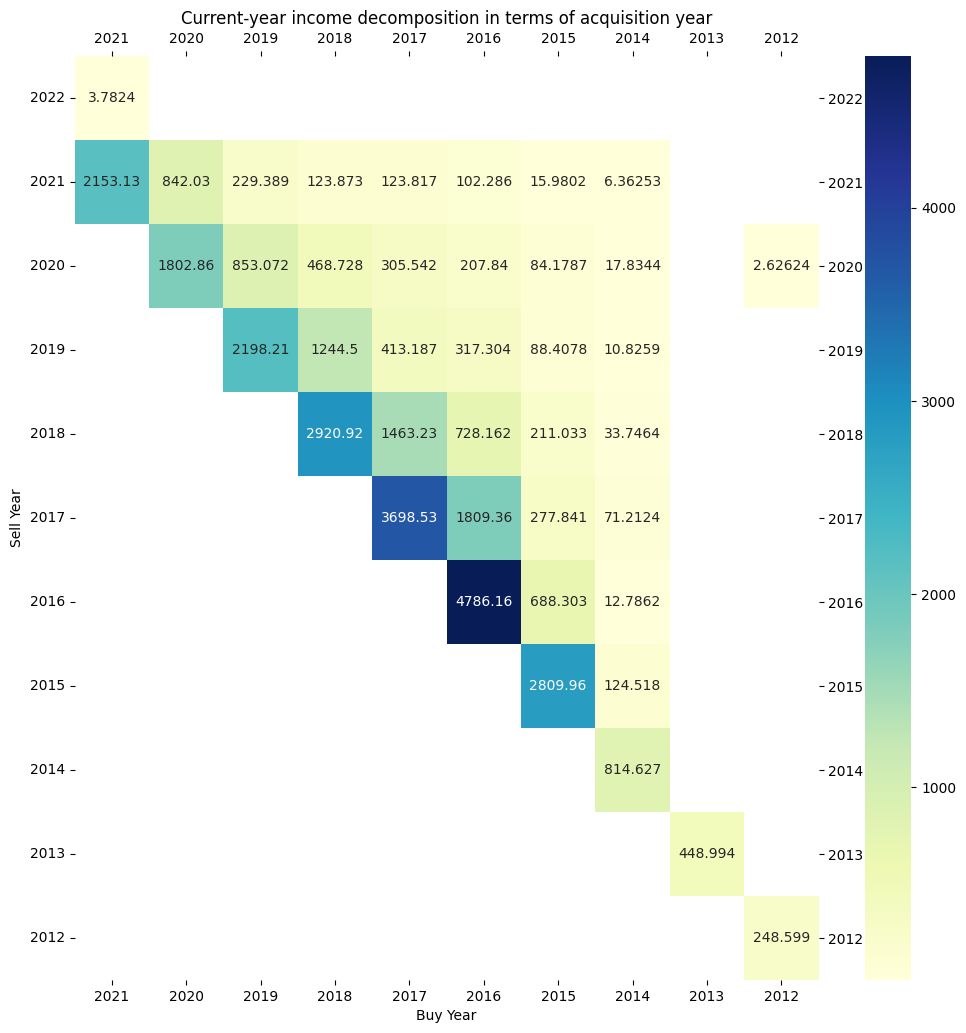

In [177]:
Itra=timeDF.groupby(["sell_year","buy_year"],as_index=\
                    (False,False))[["price_sold_BLU"]].agg("sum")
Itra.reset_index(inplace=True)
#ItraCt=timeDF.groupby(["sell_year","buy_year"]).count()
#monthbuyDF.reset_index(inplace=True)
print(Itra.tail(20))

piv_table=Itra.pivot(index="sell_year",columns="buy_year", values="price_sold_BLU")


figItra, (ax1) = plt.subplots(1, 1,figsize=(12,12))
ax1.set_title("Total By-Month Income and Investment")
#ax2.set_title("Yearly Investments")

sns.heatmap(piv_table, annot=True, cmap='YlGnBu',fmt="g")
# Customize the plot

ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0)

plt.title('Current-year income decomposition in terms of acquisition year')
plt.xlabel('Buy Year')
plt.ylabel('Sell Year')

# Show the plot
plt.show()

The above decomposition paints the picture of a business that reached a steady state. In the 2012-2016 most current-year sells came from the current year purchases. From 2017 and on the maturity becomes evident in the sense that the business benefits from year-old acquisitions. About a third of the total income stems from previous-year acquisitions. 

    sell_year  buy_year  price_sold_BLU
20       2019      2017      413.186988
21       2019      2018     1244.497891
22       2019      2019     2198.208970
23       2020      2012        2.626238
24       2020      2014       17.834407
25       2020      2015       84.178727
26       2020      2016      207.840089
27       2020      2017      305.541581
28       2020      2018      468.727843
29       2020      2019      853.071861
30       2020      2020     1802.863049
31       2021      2014        6.362528
32       2021      2015       15.980240
33       2021      2016      102.286260
34       2021      2017      123.816604
35       2021      2018      123.873312
36       2021      2019      229.388502
37       2021      2020      842.030416
38       2021      2021     2153.126900
39       2022      2021        3.782405


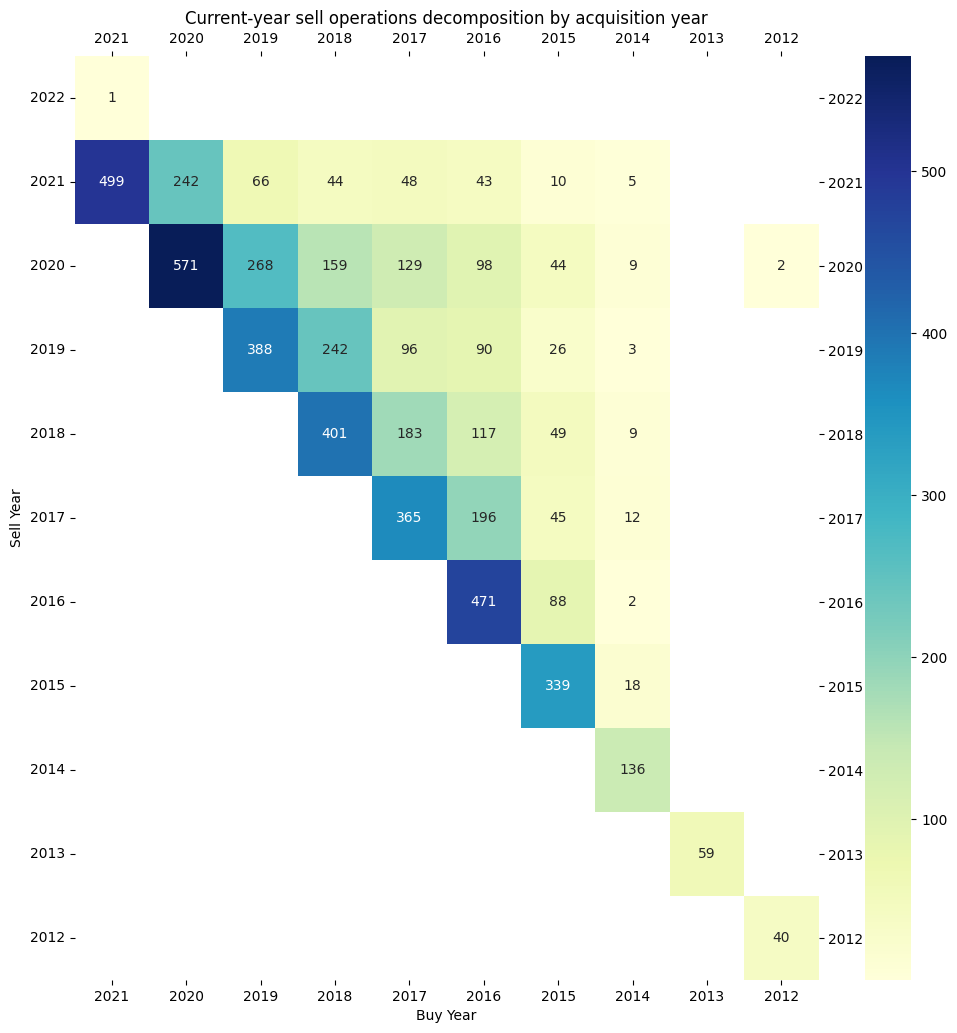

In [178]:

ItraCt=timeDF.groupby(["sell_year","buy_year"],as_index=(False,False))\
[["price_sold_BLU"]].agg("count")
ItraCt.reset_index(inplace=True)

print(Itra.tail(20))

piv_table=ItraCt.pivot(index="sell_year",columns="buy_year", values="price_sold_BLU")

figItraCt, (ax1) = plt.subplots(1, 1,figsize=(12,12))
ax1.set_title("Total By-Month Income and Investment")
#ax2.set_title("Yearly Investments")

sns.heatmap(piv_table, annot=True, cmap='YlGnBu', fmt="g")
# Customize the plot
plt.title('Current-year sell operations decomposition by acquisition year')
plt.xlabel('Buy Year')
plt.ylabel('Sell Year')
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0)
# Show the plot
plt.show()

The transaction history depicts the same history of development and maturity of the business, where a third of the sells of a given year originate from the year prior to that. 

   sell_year  buy_year  price_sold_BLU  sell_transactions  DeltaY
0       2012      2012      248.599069                 40       0
1       2013      2013      448.994088                 59       0
2       2014      2014      814.627052                136       0
3       2015      2014      124.517522                 18       1
4       2015      2015     2809.958442                339       0


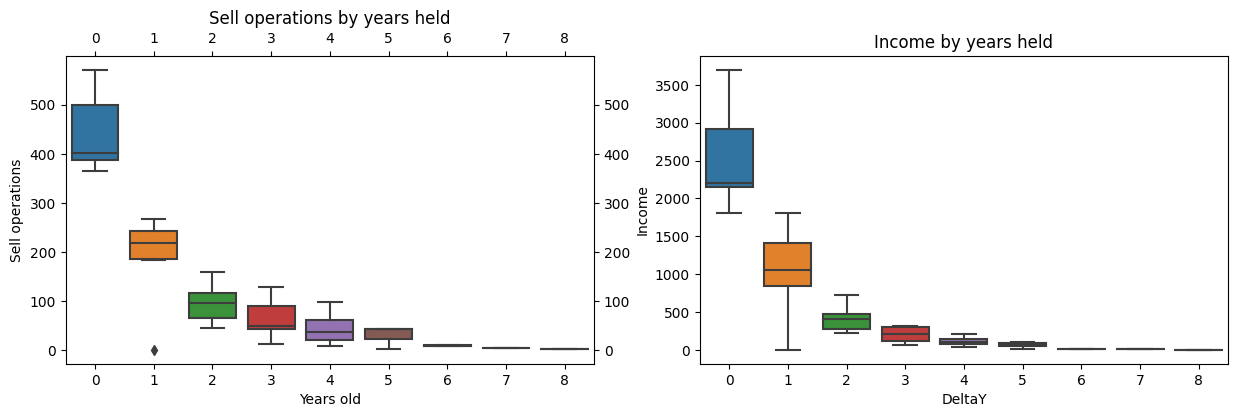

In [202]:
Itra2=Itra.copy(deep=True)
Itra2["sell_transactions"]=ItraCt["price_sold_BLU"]
Itra2["DeltaY"]=Itra2["sell_year"]-Itra2["buy_year"]
#Itra2=Itra2.merge(ItraCt,left)
print(Itra2.head())
cond2017=Itra2["sell_year"]>2016

figItraCt, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,4))

#ax2.set_title("Yearly Investments")

sns.boxplot(data=Itra2.loc[cond2017], x="DeltaY", y="sell_transactions", ax=ax1)
sns.boxplot(data=Itra2.loc[cond2017], x="DeltaY", y="price_sold_BLU", ax=ax2)

ax1.set_title('Sell operations by years held')
ax1.set_xlabel("Years old")
ax1.set_ylabel("Sell operations")
ax2.set_title('Income by years held')
ax2.set_ylabel("Years old")
ax2.set_ylabel("Income")
#ax1.invert_xaxis()
#ax1.invert_yaxis()
ax1.tick_params(right=True, top=True, labelright=True, labeltop=True, labelrotation=0)
# Show the plot
plt.show()


Within the steady state condition reached by the seller in 2017, we observe how the different prior years contribute to the current year sales number and income. Next we explore how the typical-year income and sales are composed in terms of how many years prior the books were acquired, presenting the results in pie charts. This underlines the importance of replenishing stocks, which will impact the current-year revenue and also that of the following two years.

   DeltaY  price_sold_BLU  sell_transactions
0       0       55.951653          49.865471
1       1       27.227454          25.381166
2       2        9.274311          10.829596
3       3        4.507111           7.264574
4       4        1.987800           4.058296
price_sold_BLU       1.051671
sell_transactions    2.600897
dtype: float64
   DeltaY  price_sold_BLU  sell_transactions
0       0       55.951653          49.865471
1       1       27.227454          25.381166
2       2        9.274311          10.829596
3       3        4.507111           7.264574
4       4        1.987800           4.058296
5       5        1.051671           2.600897


Text(0.5, 1.0, 'Income percentage by years held')

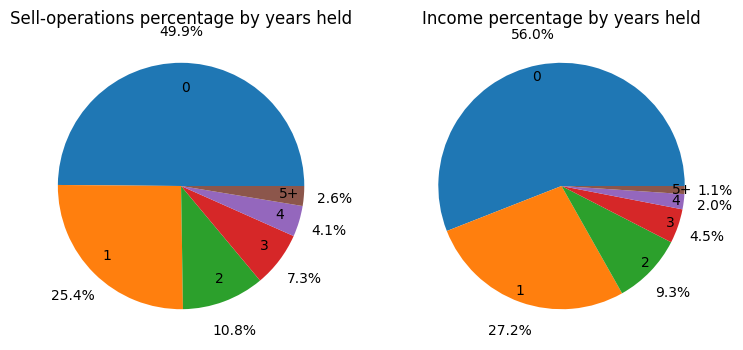

In [238]:
import matplotlib.pyplot as plt

GrpYOld=Itra2.loc[cond2017].groupby("DeltaY").sum()
GrpYOld.drop(columns=["sell_year","buy_year"],inplace=True)
TNum=GrpYOld["sell_transactions"].sum()
TInc=GrpYOld["price_sold_BLU"].sum()
GrpYOld.reset_index(inplace=True)
GrpYOld["price_sold_BLU"]=GrpYOld["price_sold_BLU"]/TInc*100
GrpYOld["sell_transactions"]=GrpYOld["sell_transactions"]/TNum*100
print(GrpYOld.head())



labs=["0","1","2","3","4","5+"]

condOld=GrpYOld["DeltaY"]>4
Resto=GrpYOld.loc[condOld].agg({"price_sold_BLU":"sum","sell_transactions":"sum"})
print(Resto.head())
GrpYOld=GrpYOld.loc[GrpYOld[ "DeltaY"]<=4]
GrpYOld.loc[len(GrpYOld)]={"DeltaY":5,"price_sold_BLU":Resto["price_sold_BLU"],\
                "sell_transactions":Resto["sell_transactions"]}
print(GrpYOld.head(7))



figItraPct,(ax1,ax2) = plt.subplots(1, 2,figsize=(9,4))
ax1.pie(GrpYOld["sell_transactions"] ,labels=labs, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.8)


ax2.pie(GrpYOld["price_sold_BLU"], autopct='%1.1f%%',
       pctdistance=1.25, labels=labs,labeldistance=.9)

ax1.set_title('Sell-operations percentage by years held')
ax2.set_title('Income percentage by years held')


The data indicates that half the current year sells come from the current year acquisitions, followed by a 25% and 11% due to one-year-old and two-year-old goods. Incomewise, the current year climbs up to a 56% absolute majority, with 27% and 9% coming from the two years prior. A slight average-price bias towars recently puchased products is evident from comparing both charts, which is expected to happen as less attractive --and thus cheaper-- titles tend to stay in stock for longer.

Another descriptive element that we want to probe is how the customer base evolves over the years. 

    sell_year  customer
6        2018       144
7        2019       153
8        2020       188
9        2021       155
10       2022         1
    sell_year  customer
6        2018       146
7        2019       162
8        2020       185
9        2021       291
10       2022         1


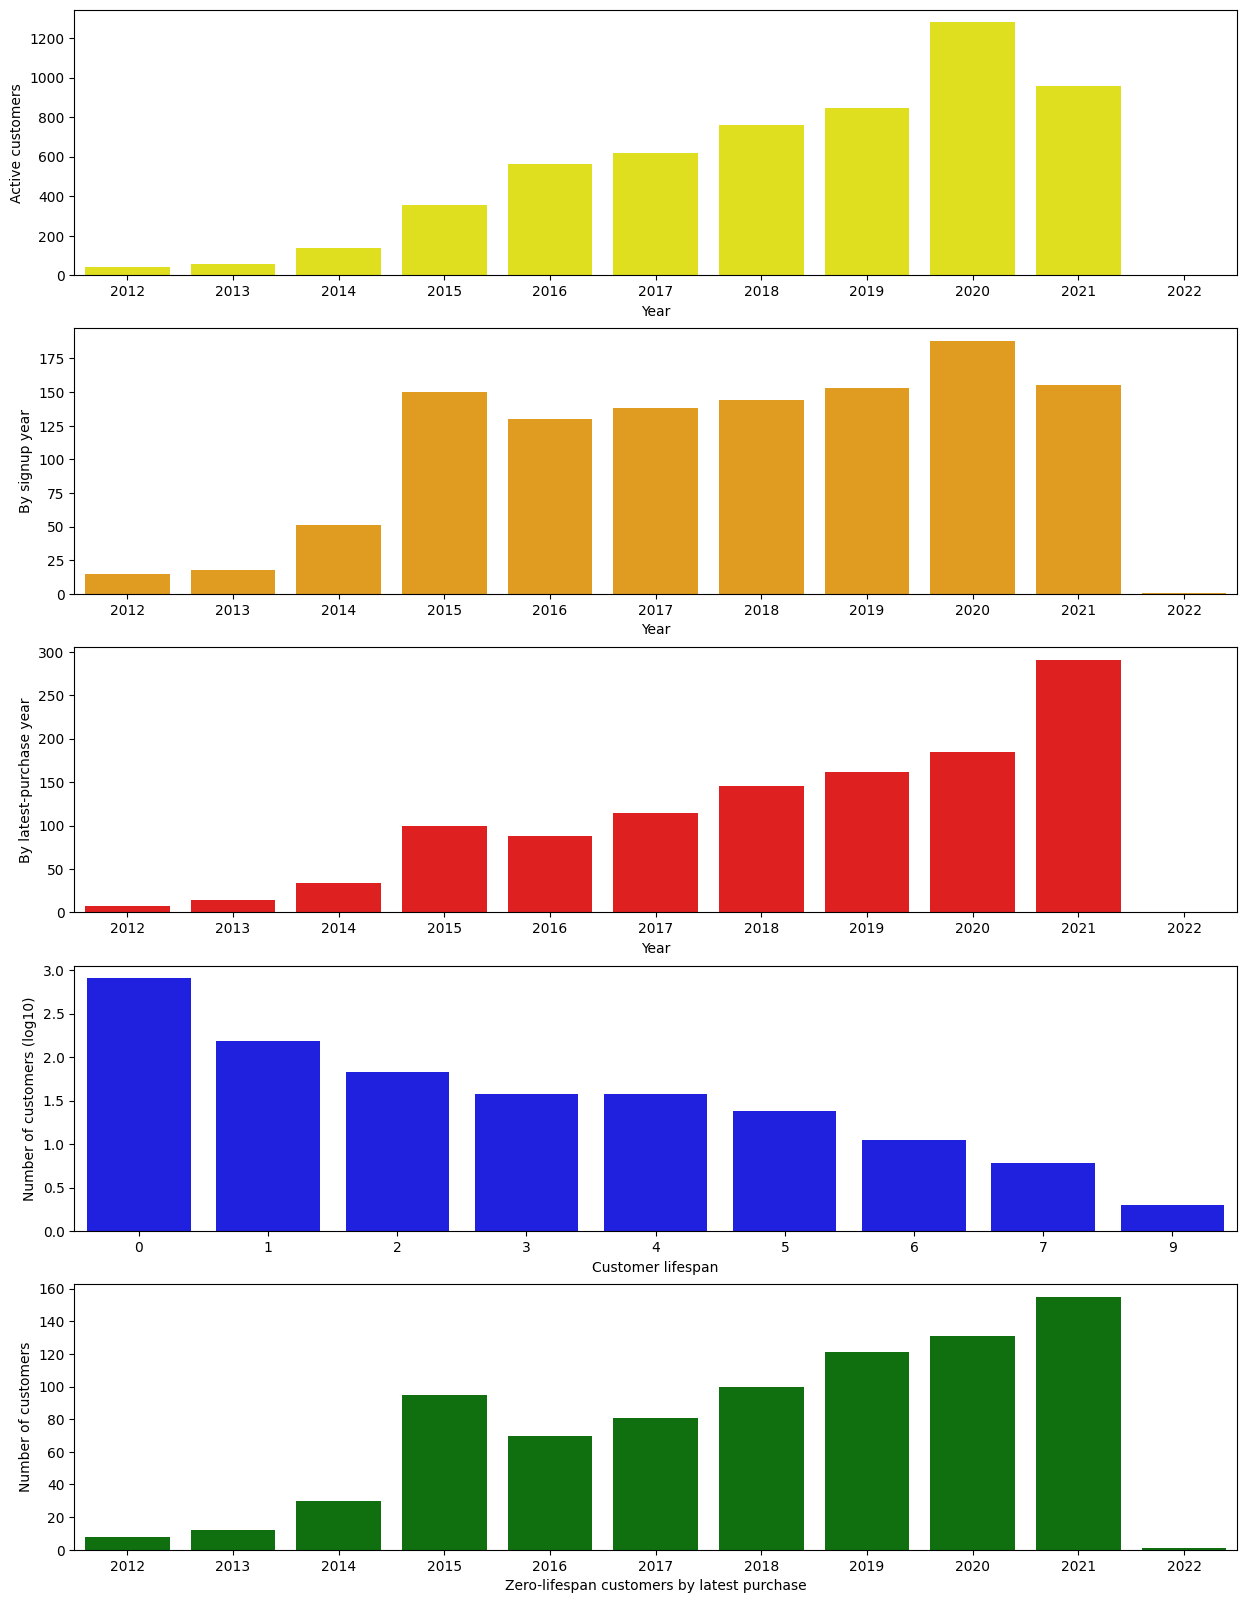

In [346]:
active=timeDF[["customer","sell_year"]].groupby(["sell_year"],as_index=(False)).agg({"customer":"count"})
#active.hist()

sup=timeDF[["customer","sell_year"]].drop_duplicates(subset=["customer"],keep="first")
last=timeDF[["customer","sell_year"]].drop_duplicates(subset=["customer"],keep="last")
tspan=last.merge(sup,\
    left_on="customer",right_on="customer", how="left",suffixes=("_last","_signup")\
        , left_index=False, right_index=False)

tspan["span"]=tspan["sell_year_last"]-tspan["sell_year_signup"]
tspan0=tspan.loc[tspan["span"]==0].groupby(["sell_year_last"],as_index=False).agg({"customer":"count"})



sup=sup.groupby("sell_year",as_index=False).agg({"customer":"count"})
print(sup.tail())

last=last.groupby("sell_year",as_index=False).agg({"customer":"count"})
print(last.tail())

tspan=tspan.groupby("span",as_index=False).agg({"customer":"count"})
tspan["customer"]=np.log10(tspan["customer"])
#print(sup.tail())

#print(tspan.head())
#tspan["span"].hist(bins=)

figYearly, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, 1,figsize=(15,20))
#ax1.set_title("Customer breakdown by year")
#ax2.set_title("Yearly Investments")


sns.barplot( active,x="sell_year",y="customer",  color="yellow",ax=ax1,\
           label="sell"  )
sns.barplot( sup, x="sell_year",y="customer",  color="orange",ax=ax2,\
          label="buy" )
sns.barplot(last, x="sell_year",y="customer",  color="red",ax=ax3,\
           label="sell"  )
sns.barplot(tspan, x="span",y="customer",  color="blue",ax=ax4,\
           label="sell"  )
sns.barplot(tspan0, x="sell_year_last",y="customer",  color="green",ax=ax5,\
           label="sell"  )

ax1.set_xlabel("Year")
ax1.set_ylabel("Active customers")

ax2.set_xlabel("Year")
ax2.set_ylabel("By signup year")

ax3.set_xlabel("Year")
ax3.set_ylabel("By latest-purchase year")

ax4.set_xlabel("Customer lifespan")
ax4.set_ylabel("Number of customers (log10)")

ax5.set_xlabel("Zero-lifespan customers by latest purchase")
ax5.set_ylabel("Number of customers")

#ax1.legend()
plt.show()

We see that the active customers, those that have purchased books a given year, increased from 2012 to 2020, while dropping in 2021. We created two metrics: the customer signup year and the year of last purchase. By signup we define the year of the first purchase, i.e., when they became customers for the first time. Customer incorporation became relatively stable since 2015, before the business reached maturity in 2017 regarding the year of acquisition for sales on a given year. The customer dropout (by year of last purchase) increased linearly, but at most, in 2020 less than 200 customers ceased buying books. A clear insight cannot be made out of those with a last purchase during 2021 because it is likely that some were active during 2022. 
Overall, the active customer base went up over the years. It particularly ramped up in 2020 and fell during 2021. The 2020 increase can be explained by the start of the pandemic, where people still had their normal wealth level but were starting to be forced to quarantine, having more time to pursue the habit of reading. Even though the 2021 GDP shows a recovery, the lagging effect of people draining their savings during 2020 could have played a factor. It could be interesting to probe whether the 2021 GDP increase ended up producing a customer increase in 2022. 
We finally observe how the customer lifespans (time between first to last purchase) distribute. There zero- lifespan customers are close to 1000, while one-year lifespans are around 100, dropping to 10 in the six-year-lifetime group. Given that zero-lifetime customers dominate the one-year-lifespan customers by an order of magnitude we explore that group in detail as well. The majority are indeed one-time purchases whose most recent buy dates back to 2020, while roughly 150 have bought a book in 2021 and may still be active as customers. 

## Customer segmentation in time

The customer segmentation approach carried out previously does not involve any time evolution. In this section we intend to probe its incidence. Recency, Frequency, Monetary. Frequency is usually determined by the number of purchases, albeit with no timescale. Recency accounts for the how long it was since a customer's last operation, and the monetary index is usually the total spent by each customer.

Some thought was given to whether include a timescale in order to make a proper frequency in the sense of purchases per unit time. This required defining an overall timeline in days with which to calculate time intervals. This timeline starting date does not matter, since we operate with time deltas. The following thought experiment tipped the decission against introducing the timescale: consider a customer that in 2018 purchased three books, one per week. Then in 2021 this person reappears and buys another book. The recency suddenly vanishes and so does the frequency, radically changing the customer's R and F, potentially changing their profile from one cluster to another. This would require a more intensive strategy readjustment, which may be beyond the seller's means. In turn, if the frequency is defined as recount of books purchased, F would only change moderately as opposed to R, making the change less dramatical and keeping the groupings more slowly varying, with less need to adjust the action plans.

For the monetary value we chose to go with the customer's average purchase, given that the frequency already takes the number of purchases into consideration. We observed a better separation using the average instead of the total spent per customer. 

### Recency-Frequency-Monetary based segmentation

The oldest date in the set is:  2012-07-12 00:00:00
sRFM columns Index(['customer', 'monetary', 'last_purchase', 'total_purchases', 'signup',
       'monetaryT', 'lifespan'],
      dtype='object')
sRFM describe           monetary  last_purchase  total_purchases       signup    monetaryT  \
count  1143.000000    1143.000000      1143.000000  1143.000000  1143.000000   
mean      6.443401    2371.718285         4.910761  2105.434821    28.664696   
std       3.841410     826.023398        11.809377   839.404138    58.886011   
min       1.112184      19.000000         1.000000    12.000000     1.280025   
25%       3.636086    1767.000000         1.000000  1394.500000     6.368862   
50%       5.717635    2512.000000         2.000000  2185.000000    11.445474   
75%       8.110694    3119.500000         5.000000  2875.500000    26.650300   
max      36.070017    3462.000000       234.000000  3462.000000   916.459644   

          lifespan  
count  1143.000000  
mean    266.283465  
std  

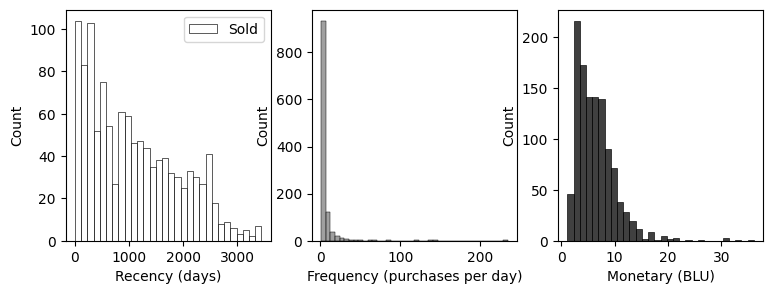

sRFMlog columns Index(['recency', 'freq', 'monetary', 'customer', 'monetaryT'], dtype='object')
sRFMlog describe            recency         freq     monetary    monetaryT
count  1143.000000  1143.000000  1143.000000  1143.000000
mean      6.547868     0.389579     0.825159    28.664696
std       1.137748     0.434768     0.196942    58.886011
min       0.000000     0.000000     0.324732     1.280025
25%       5.839186     0.000000     0.666151     6.368862
50%       6.857514     0.301030     0.827216    11.445474
75%       7.436027     0.698970     0.959551    26.650300
max       8.144389     2.369216     1.569023   916.459644
sRFMlogStd columns Index(['recency', 'freq', 'monetary', 'customer', 'monetaryT'], dtype='object')
sRFMlogStd describe             recency          freq      monetary    monetaryT
count  1.143000e+03  1.143000e+03  1.143000e+03  1143.000000
mean   4.102871e-16  5.050883e-17  2.331177e-16    28.664696
std    1.000438e+00  1.000438e+00  1.000438e+00    58.886011
mi

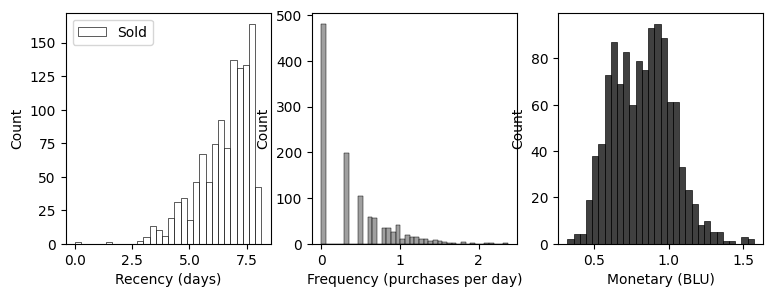

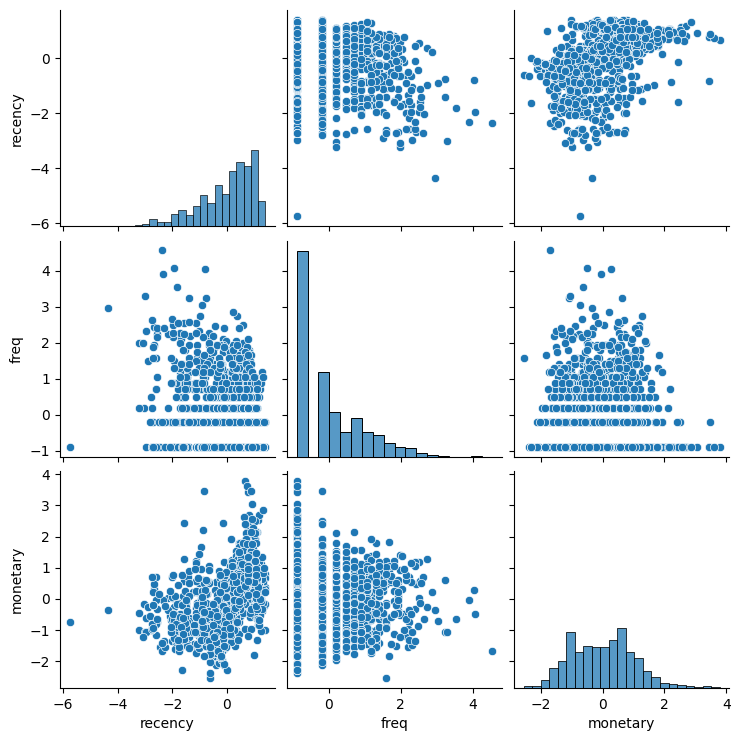

In [466]:

startdate=timeDF["purchase_date"].min()
print("The oldest date in the set is: ", startdate)
timeDF["timeline"]=timeDF["sell_date"]-startdate
timeDF["timeline"]=timeDF["timeline"].dt.days
#timeDF["timeline"].hist(bins=20)

lasttime=timeDF["timeline"].max()
sRFM=timeDF.groupby(["customer"]).agg({"price_sold_BLU":"mean","timeline":"max","buy_month":"count"})
sup=timeDF.groupby(["customer"]).agg({"timeline":"min"})
totspend=timeDF.groupby(["customer"]).agg({"price_sold_BLU":"sum"})#,"timeline":"max","buy_month":"count"})
totspend.rename(columns={"price_sold_BLU":"monetaryT"},inplace=True)
#sRFM["timeline"]=sRFM["timeline"]
sRFM.rename(columns={"timeline":"last_purchase","buy_month":"total_purchases","price_sold_BLU":"monetary"}, inplace=True)
sRFM=pd.merge(sRFM,sup,left_on="customer",right_on="customer")
sRFM=pd.merge(sRFM,totspend,left_on="customer",right_on="customer")
sRFM.rename(columns={"timeline":"signup"}, inplace=True)
sRFM["signup"]=sRFM["signup"]
sRFM["lifespan"]=sRFM["last_purchase"]-sRFM["signup"]

sRFM.reset_index(inplace=True)
print("sRFM columns", sRFM.columns)
print("sRFM describe",sRFM.describe())

### a measure of the frequency is given by the total 
### transaction number divided by the lifespan.
### Only lifespans of 1 day and beyond make sense. 

#critLS=sRFM["lifespan"]>0
#sRFM=sRFM.loc[critLS]
sRFM["freq"]=sRFM["total_purchases"]# /sRFM["lifespan"]
sRFM["recency"]=lasttime-sRFM["last_purchase"]


figRFMhisto, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(9,3))
sns.histplot( sRFM["recency"], bins=30, color="white",ax=ax1,label="Sold")
sns.histplot( sRFM["freq"], bins=40, color="grey",ax=ax2,label="Sold")
sns.histplot( sRFM["monetary"], bins=30, color="black",ax=ax3,label="Sold")
ax1.set_xlabel("Recency (days)")
ax2.set_xlabel("Frequency (purchases per day)")
ax3.set_xlabel("Monetary (BLU)")
ax1.legend()
plt.show()

##

#We make the data more normal

cols=["recency","freq","monetary"]
sRFMlog=sRFM[cols].copy(deep=True)
sRFMlog["monetary"]=np.log10(sRFM["monetary"]+1.0)
sRFMlog["recency"]=np.log(sRFM["recency"]+1.0)
sRFMlog["freq"]=np.log10(sRFM["freq"])
custSer=sRFM["customer"]#=CustoJoin["customer"]
sRFMlog["customer"]=custSer
sRFMlog["monetaryT"]=sRFM["monetaryT"]

print("sRFMlog columns",sRFMlog.columns)
print("sRFMlog describe",sRFMlog.describe())

sca=preprocessing.StandardScaler()
sRFMlogStd=sRFMlog[cols].copy(deep=True)
dataStd=sca.fit_transform(sRFMlog[cols])
custSer=sRFM["customer"]#=CustoJoin["customer"]
sRFMlogStd=pd.DataFrame(dataStd,columns=cols)
sRFMlogStd["customer"]=custSer
sRFMlogStd["monetaryT"]=sRFM["monetaryT"]

print("sRFMlogStd columns",sRFMlogStd.columns)
print("sRFMlogStd describe",sRFMlogStd.describe())
print("sRFMlogStd info",sRFMlogStd.info())

scaler=preprocessing.StandardScaler()
sRFMStd=sRFM[cols].copy(deep=True)
custSer=sRFM["customer"]
dataStd=scaler.fit_transform(sRFM[cols])
#sRFMStd=pd.DataFrame(dataStd,columns=cols)
sRFMStd["customer"]=custSer#CustoJoin["customer"]
sRFMStd["monetaryT"]=sRFM["monetaryT"]
print("sRFMStd columns",sRFMStd.columns)
#CustoJoin.reset_index(inplace=True)

print("Scaler means: ",scaler.mean_)
print(CustoJoinStd.head())



figRFMhisto2, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(9,3))
sns.histplot( sRFMlog["recency"], bins=30, color="white",ax=ax1,label="Sold")
sns.histplot( sRFMlog["freq"], bins=40, color="grey",ax=ax2,label="Sold")
sns.histplot( sRFMlog["monetary"], bins=30, color="black",ax=ax3,label="Sold")

ax1.set_xlabel("Recency (days)")
ax2.set_xlabel("Frequency (purchases per day)")
ax3.set_xlabel("Monetary (BLU)")

ax1.legend()
plt.show()
#print(sRFM.head())
#print(sRFM.columns)

#figCorrel, ax1= plt.subplots(1,1,figsize=(12,12))
sns.pairplot(  sRFMlogStd[["recency","freq","monetary"]])
plt.show()

The correlation plot of the normalized and standardized variables depicts mostly globular shapes, with the monetary aspect showing positive correlation with recency. 

We also explore whether a principal component decomposition can provide better separation and more evident understandings.

Explained variance : [0.55160454 0.3058835  0.14251196]
Principal components makeup : [[-0.68205427  0.43667698 -0.58661331]
 [ 0.05599883  0.83098088  0.5534753 ]
 [-0.72915437 -0.34465054  0.59122746]]


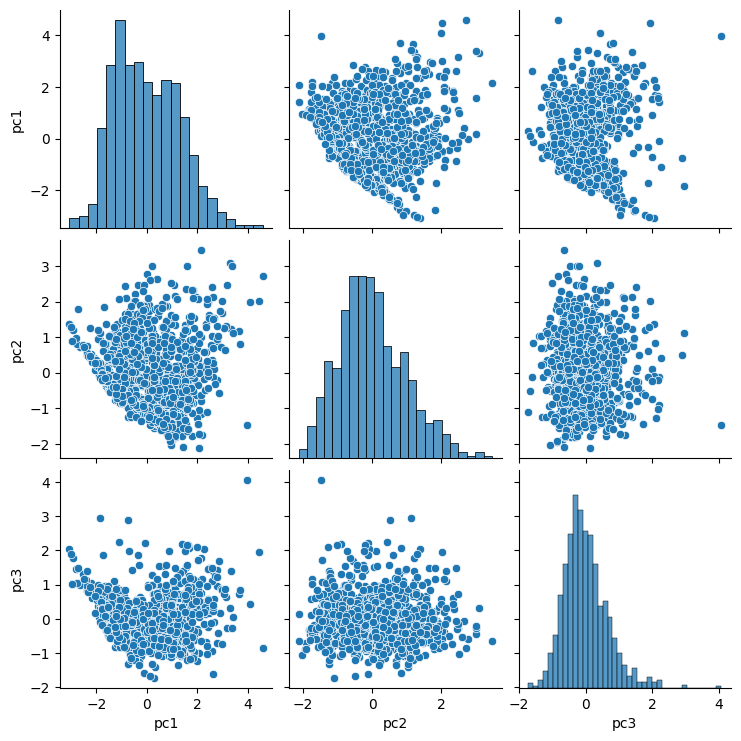

In [464]:

pca = skl.decomposition.PCA(n_components=3)
pcaArray= pca.fit_transform(sRFMlogStd[["recency","freq","monetary"]])
pcaRFM=pd.DataFrame(data=pcaArray, columns=["pc1","pc2","pc3"]  )
pcaRFM["customer"]=sRFMlogStd["customer"]
pcaRFM["monetaryT"]=sRFMlogStd["monetaryT"]
print("Explained variance :", pca.explained_variance_ratio_)
print("Principal components makeup :", pca.components_)
sns.pairplot(  pcaRFM[["pc1","pc2","pc3"]])
plt.show()

================ imy : 0  ======= nclus : 2 ===================
cluster_labels: 
dict_keys([1, 0])
dict_values([543, 600])
(1143, 3)
(1143,)


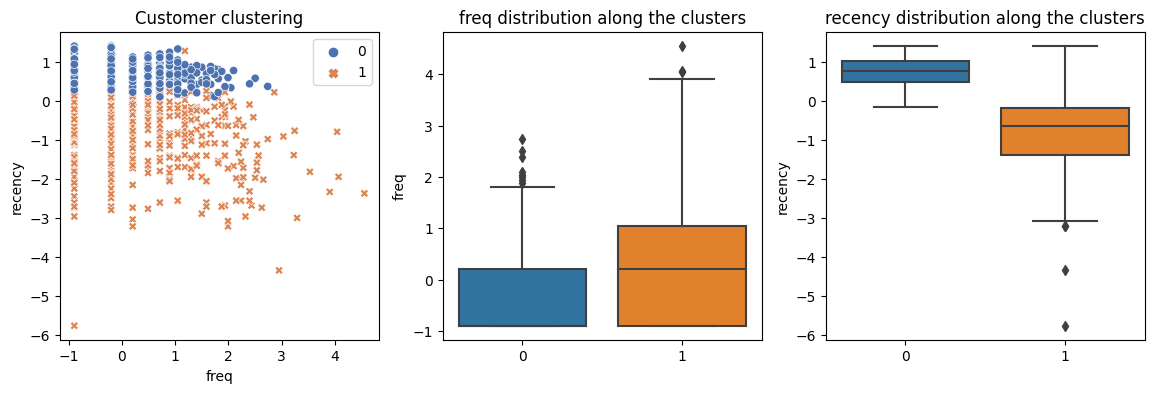

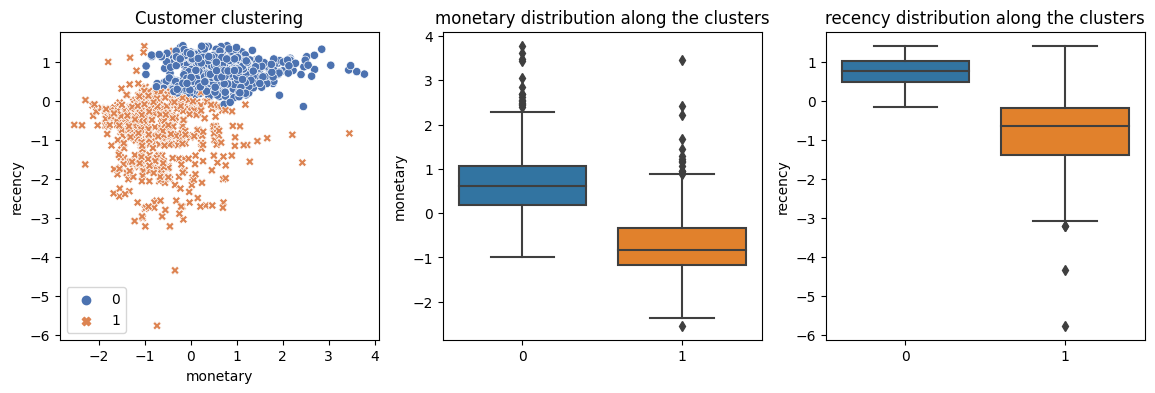

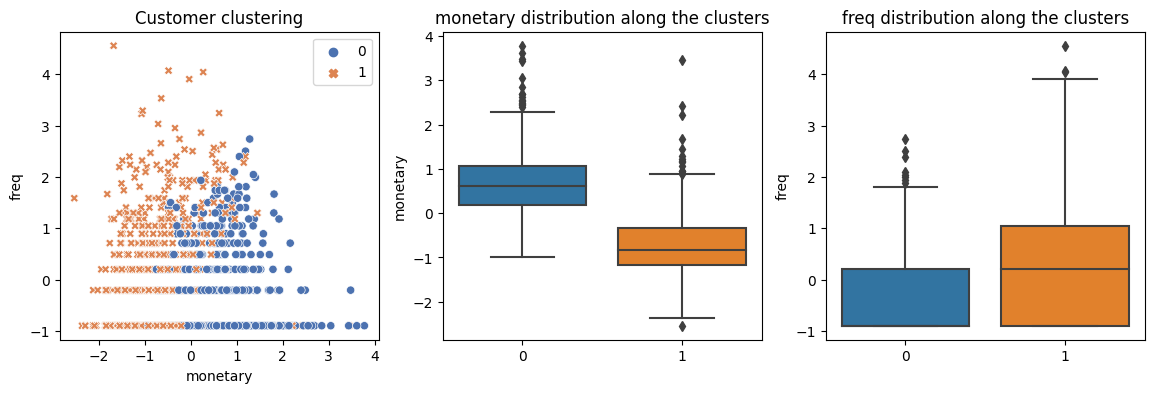


Total income per cluster
            monetaryT
cluster              
0        14885.081179
1        17878.666152
================ imy : 0  ======= nclus : 3 ===================
cluster_labels: 
dict_keys([1, 2, 0])
dict_values([480, 379, 284])
(1143, 3)
(1143,)


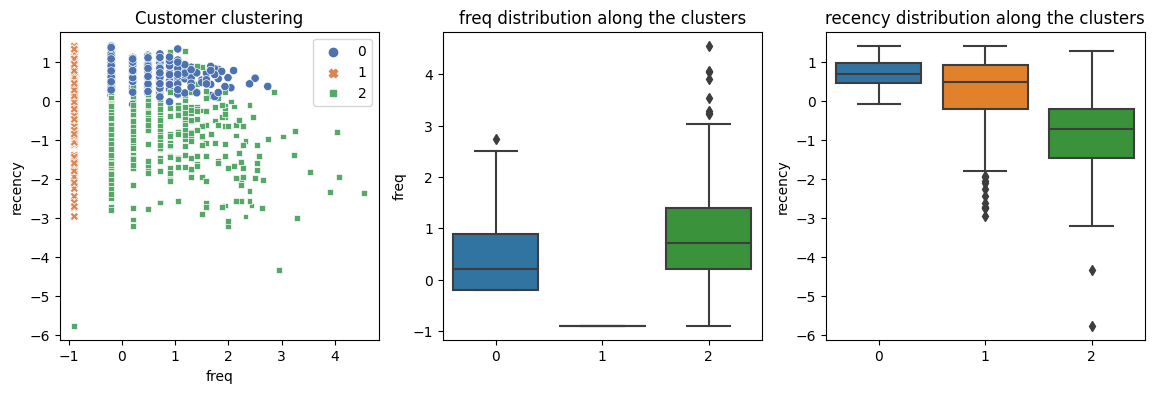

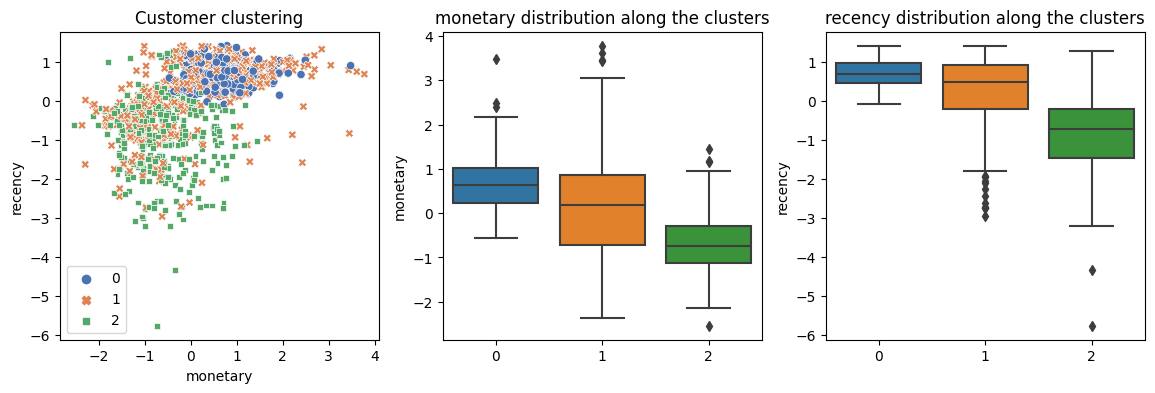

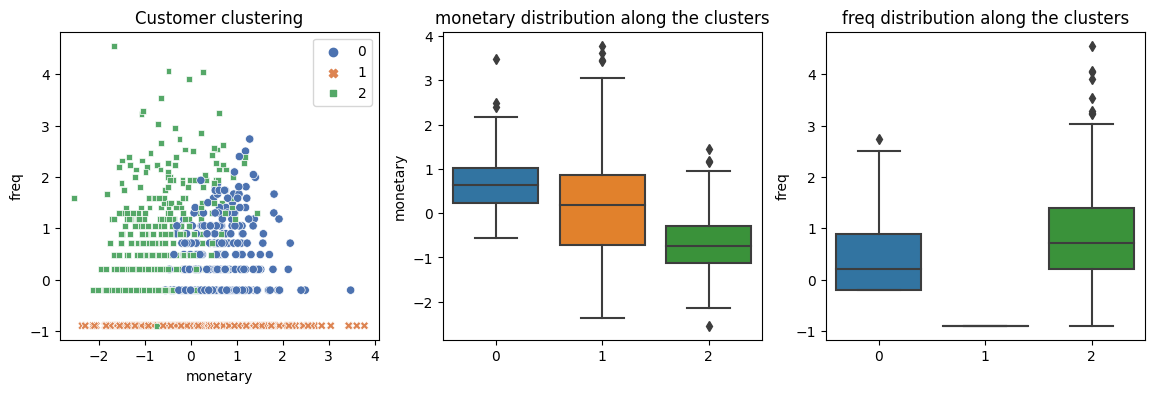


Total income per cluster
            monetaryT
cluster              
0        11934.435642
1         3416.228087
2        17413.083602
================ imy : 0  ======= nclus : 4 ===================
cluster_labels: 
dict_keys([0, 1, 2, 3])
dict_values([480, 185, 308, 170])
(1143, 3)
(1143,)


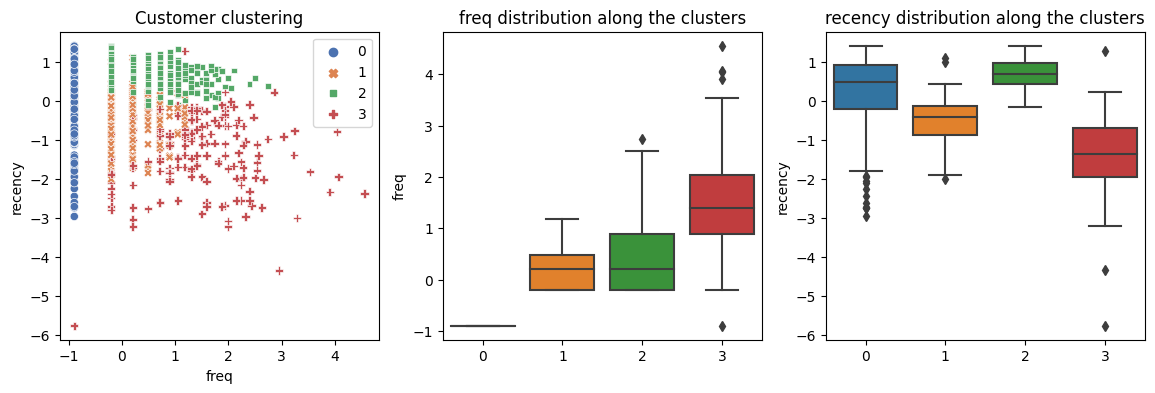

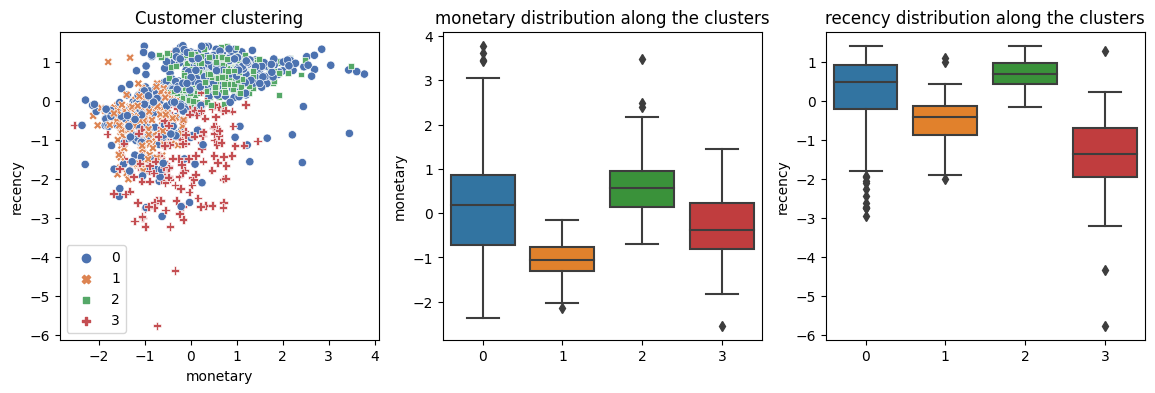

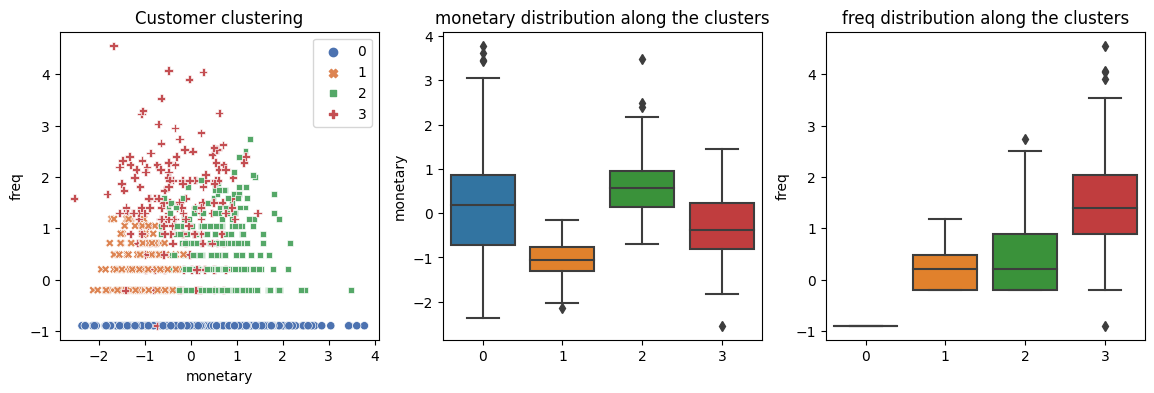


Total income per cluster
            monetaryT
cluster              
0         3416.228087
1         1989.349541
2        12777.855129
3        14580.314575
================ imy : 1  ======= nclus : 2 ===================
cluster_labels: 
dict_keys([1, 0])
dict_values([543, 600])
(1143, 3)
(1143,)


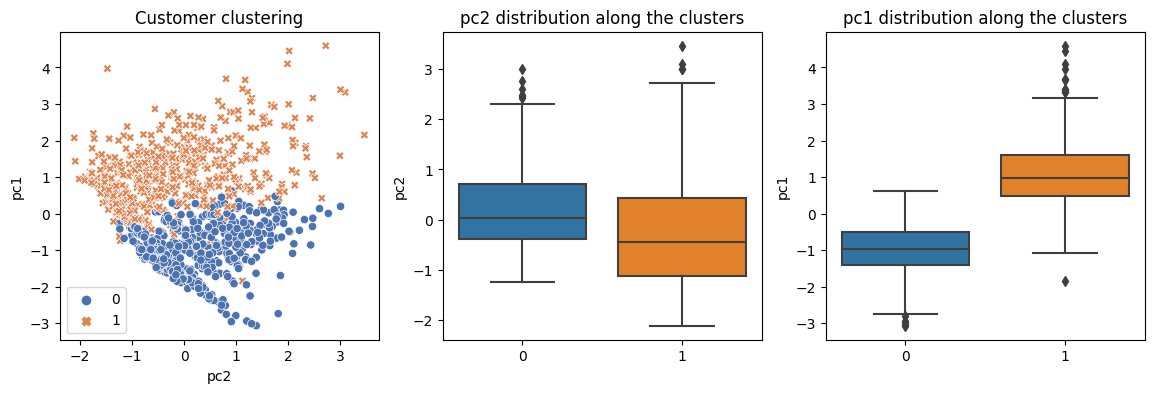

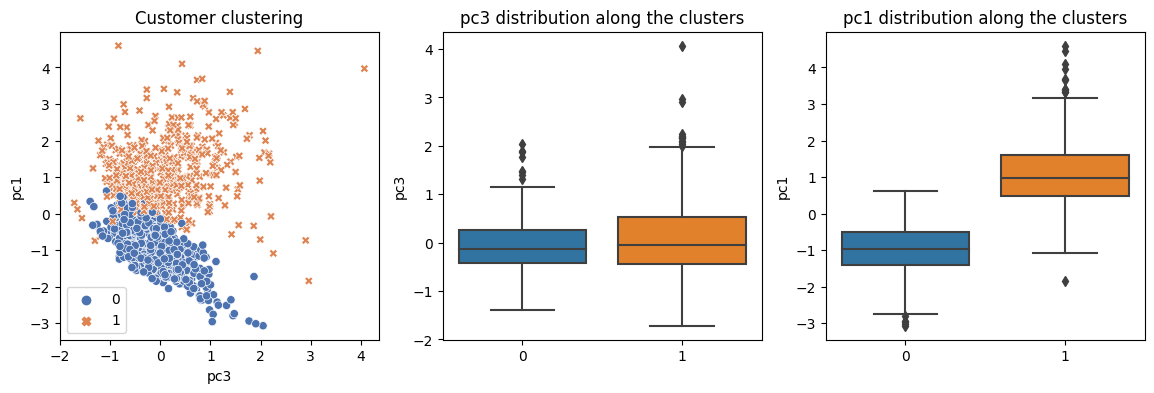

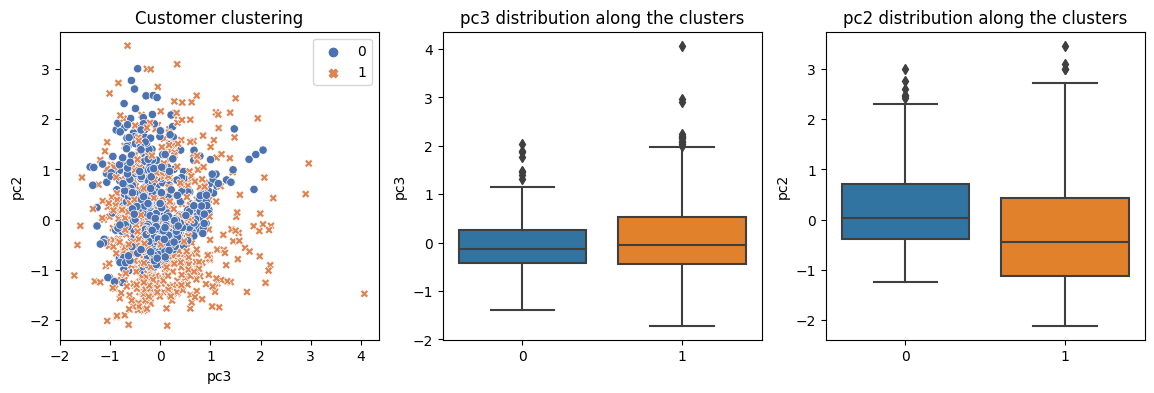


Total income per cluster
            monetaryT
cluster              
0        14885.081179
1        17878.666152
================ imy : 1  ======= nclus : 3 ===================
cluster_labels: 
dict_keys([1, 2, 0])
dict_values([480, 379, 284])
(1143, 3)
(1143,)


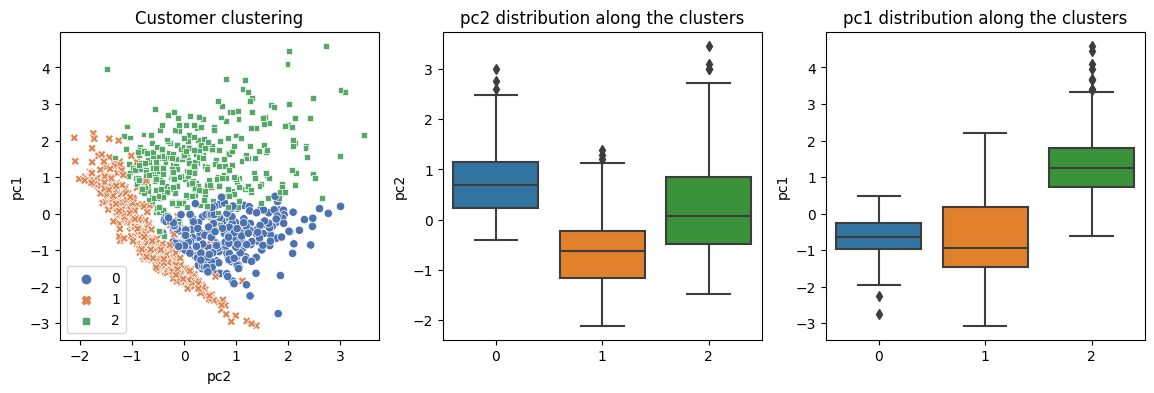

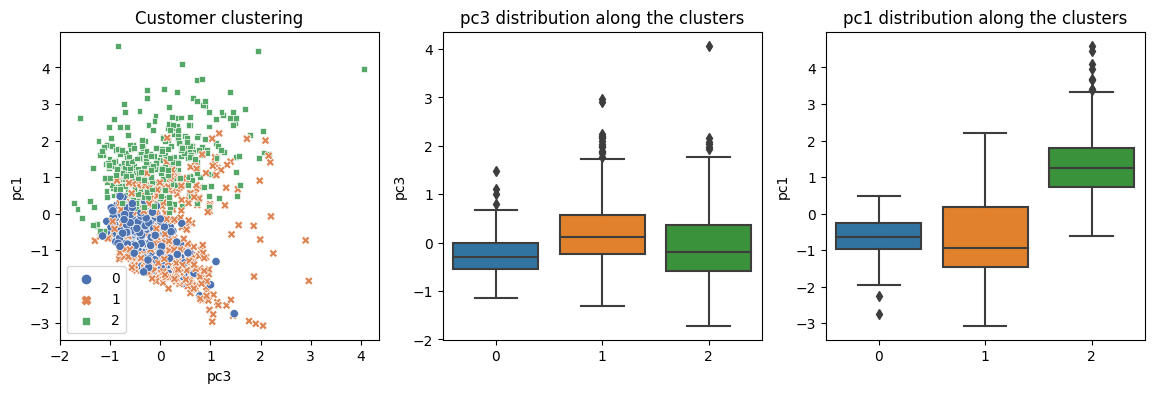

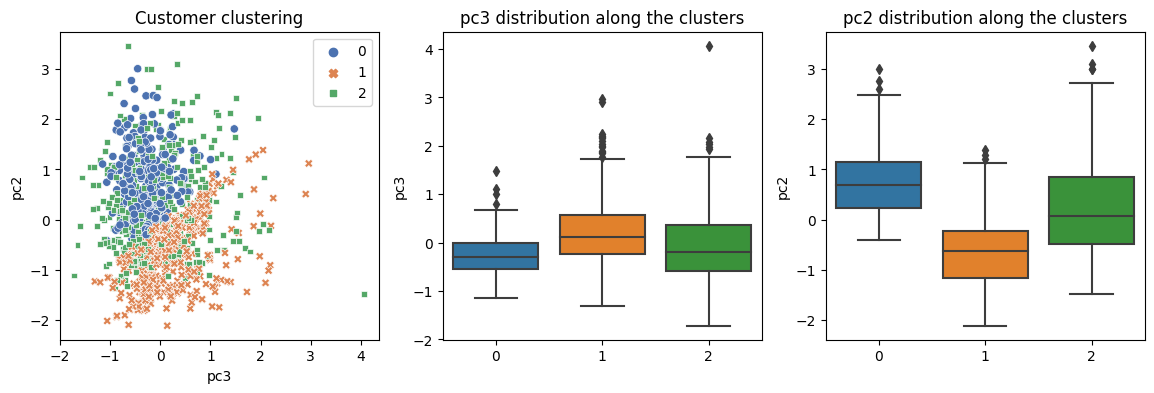


Total income per cluster
            monetaryT
cluster              
0        11934.435642
1         3416.228087
2        17413.083602
================ imy : 1  ======= nclus : 4 ===================
cluster_labels: 
dict_keys([0, 1, 2, 3])
dict_values([480, 185, 308, 170])
(1143, 3)
(1143,)


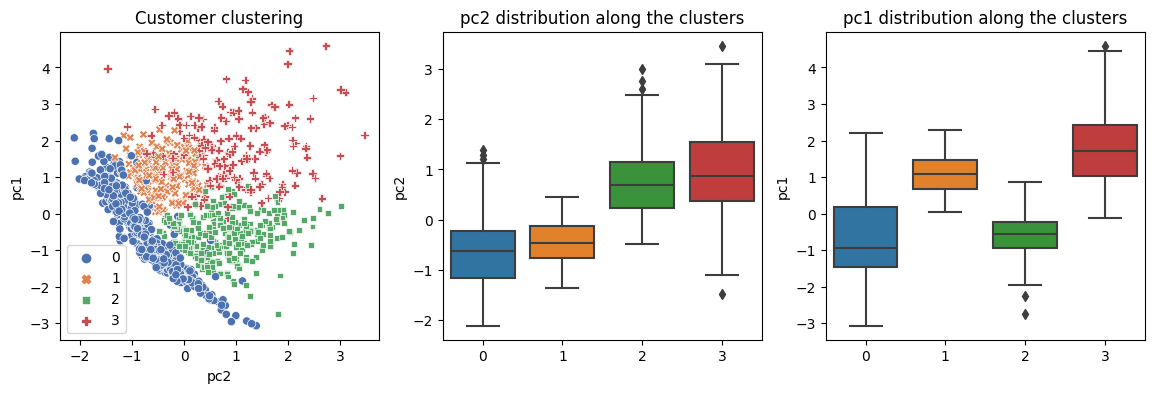

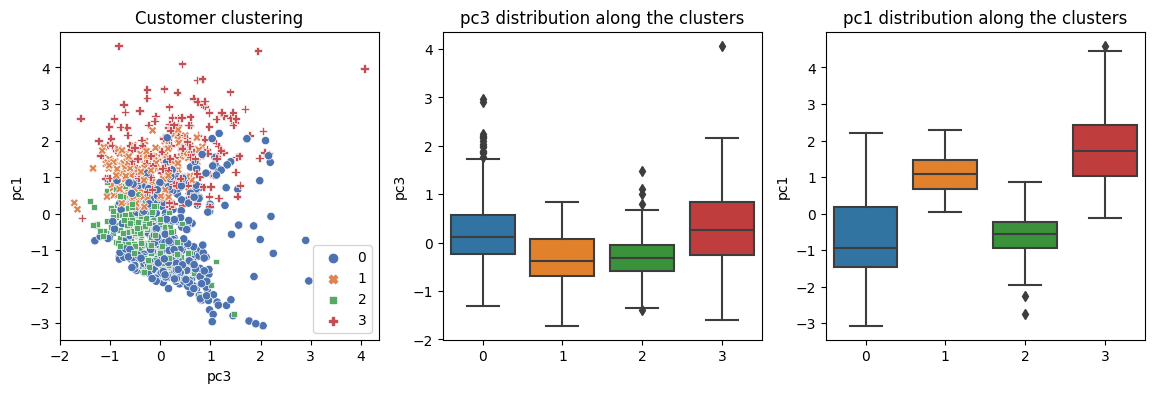

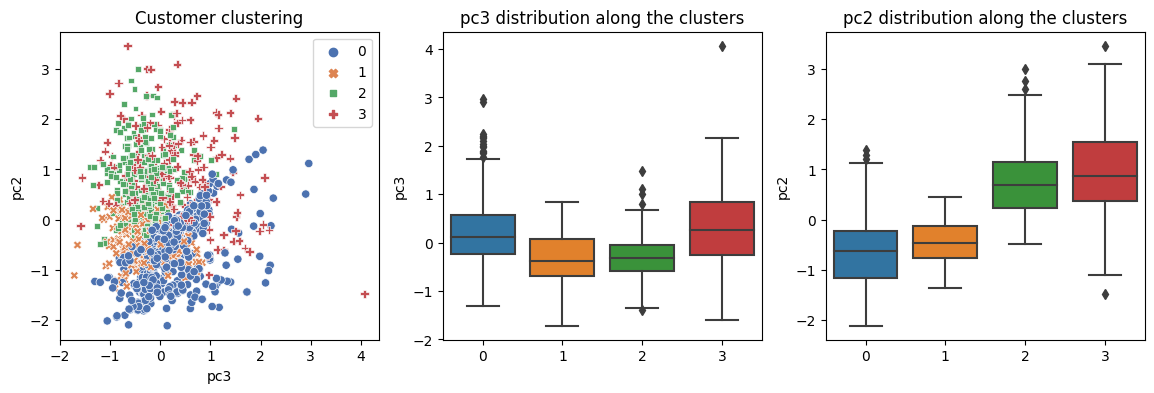


Total income per cluster
            monetaryT
cluster              
0         3416.228087
1         1989.349541
2        12777.855129
3        14580.314575


In [480]:
#sRFMlog=
interestCols=["customer","recency","freq","monetary","monetaryT"]
setLs=[sRFM[interestCols],\
       sRFMlog[interestCols],\
      sRFMStd[interestCols],\
       sRFMlogStd[interestCols]]
#labelLs=[CustoJoinStd.labelvec]*len(setLs)#,FullSet.labelvec]
setLs=[sRFMlogStd[interestCols],pcaRFM[["customer","pc1","pc2","pc3","monetaryT"]]]
setType=["direct","pca"]
subcolsClus={"direct":["recency","freq","monetary"],"pca":["pc1","pc2","pc3"]}
dfFileTags=["sRFMlogStd","pcaRFM"]
cluslabLs={}
nclusLs=[2,3,4]

for imy,myset in enumerate(setLs):
    for nclus in nclusLs:
        print("================ imy :",imy," ======= nclus :", nclus,    "===================")
        subcols=subcolsClus[setType[imy]]
        clslabs=reclassif(myset[subcols],nclus=nclus)
        cluslabLs[nclus]=clslabs
        print()
        tempDct={"customer":myset["customer"],"cluster":clslabs,"monetaryT":myset["monetaryT"]}
        tempDF=pd.DataFrame(tempDct)
        tempgp=tempDF.groupby("cluster").agg({"monetaryT":"sum"})
        print("Total income per cluster")
        print(tempgp)
        tempDF[["customer","cluster"]].to_csv("CustomerClusters/CLUSTER_N"+str(nclus)+"_"+dfFileTags[imy])
        sortedClus=tempDF[["customer","cluster"]].sort_values(by=["cluster"])
        sortedClus.to_csv("CustomerClusters/sortedCLUSTER_N"+str(nclus)+"_"+dfFileTags[imy])
        #myset["cluster_labels"]=clslabs#reclassif(myset,nclus=3)
        print("==============================================================================")
        


##### We explored the option of segmenting customers in two, three and four groups. The three variables explored here are not multimodal distributions, i.e., there are no obvious hard boundaries that would naturally suggest a segmentation. Therefore, cluster interpenetration is expected and for these cases the belonging to a group or another could be put in question. Nevertheless, despite some individuals here and there that lie in the boundary of two or more clusters, overall a separation can be made and the traits of each group do paint a picture.

We decided that the clustering based on a principal component decomposition does not improve groupings and neither does it bring crearer interpretations, so we stuck to the original variables. 

In order to maintain repeatability given a nonchanging input dataframe, the random startup value when calling the clustering algorithm has been fixed.

Two cluster segmentation (2C):   
-Group 0: High recency (long time since last purchase), higher monetary value.   (543 members, 14885 BLU)   
-Group 1: Low recency (more recently active), lower monetary value.   (600 members, 17879 BLU)   
This two-group segmentation does not discriminate by frequency, as both groups are spread over the frequency spectrum with no distinction, hinting we need additional clusters. No significant difference in number or total revenue exist between the groups.

Three-cluster segmentation (3C):  
-Group 0: High recency, mid frequency, high monetary value. (284 members, 11934 BLU). **This group makes a third of the total income, they are the *slow and heavy*, less active than averge but make splash purchases.**  
-Group 1: Low frequency **(single purchase only)**, high recency (long time since last transaction) and spread monetary value. (480 members, 3416 BLU). One-off buyers, there are many of these customers, but they represent about 10% of the overall revenue.  
-Group 2: Low recency, high frequency, lower monetary value. (379 members, 17413 BLU). **Mainstream group. Currently active, frequent, although low price point**. This group makes more than half the total revenue over the years by their large numbers. 

Four cluster segmentation (4C):  
-Group 0: Very low frequency, mid recency and low monetary value.  (480 members, 3416 BLU). **One-off buyers**, there are many of these customers, but they represent about 10% of the overall revenue.  
-Group 1: Mid recency, low frequency, low monetary value. (185 members, 1981 BLU). **Low priority**. Low frequency group with a low purchase-value average. 
-Group 2: High recency, high monetary value, low-to-mid frequency.  (308 members, 12778 BLU). **The *slow and heavy*, this group makes a third of the total income, less active than averge but make splash purchases.**  
-Group 3: Low recency, high frequency and mid monetary value. (170 members, 14580 BLU). **Mainstream group. Currently active, repeat customers. These amount to ~40% of the total revenue.**

The four-cluser segmentation appears more satisfactory. While both spot the **one-off** and the **slow and heavy** buyers, 4C does a better job at distinguishing the two highest-contributing clusters and clearly delimits a low priority group.

Given this is a single-person business there would be no point in creating more than four groups. The seller does not have a marketing department at his disposal to create campaigns targeting each specific cohort. Moreover, the 4C distinctions are descriptive enough, indicating the highest contributing groups, namely the **Mainstream** and **Slow-and-heavy**, while also categorizing the **One-off** consumers and the **Low-priority**.

The customer labeling corresponding to the segmentation efforts are exported to the *CustomerClusters/* directory. These customer names are the previously anonymyzed ones. In principle, the person in charge of the data processing can perform the study without the real names and deliver the groupings in pseudinimized form. Assuming a different person did the anonymization process, the seller can match de *name-pseudonym* table to the cluster analysis to make the information actionable upon. 
